# Statistics - HW3

### IDs:
Insert yours IDs to the cell below



ID #1: 300420379

ID #2: Ben approved to submit alone


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1001]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt 


Disabling autoscrolling for long output:

In [1906]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        });

<IPython.core.display.Javascript object>

Hide warnings

In [1963]:
import warnings
warnings.filterwarnings('ignore')

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a scatter plot. If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>

##### Note: I'm using this notation
$Pearson(x,y) = Pearson correlation \space\space\space\space\space\space\space\space\space\space => p  $  
$τ(x,y) \space\space\space\space\space\space\space\space\space\space\space = Kendall rank correlation \space\space\space => k  $  
$ρ(x,y) \space\space\space\space\space\space\space\space\space\space\space      = Spearman rank correlation   => s  $  

In [1631]:
n = 50

#### 1.A
Data in which the Pearson(x,y)>0.9 but where n-1 points can be selected so that for the vectors restricted to those we have Pearson correlation <0.1

Pearson(x,y) with n   is 0.923 >0.9
Pearson(x,y) with n-1 is -1.0 <0.9


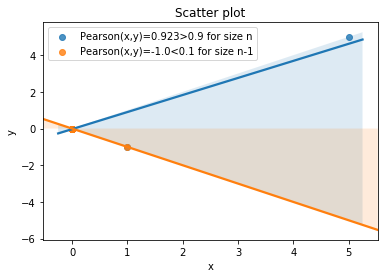

,x,y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [1642]:
# The Idea is creating something like this
# x = [0,...,0,1,5]
# y = [0,...,0,-1,5]

x = [0] * n
y = x.copy()
x[n-2] = 1
x[n-1] = 5
y[n-2] = x[n-2]*(-1)
y[n-1] = x[n-1]

p1 = ss.pearsonr(x,y)[0]
p2 = ss.pearsonr(x[:-1],y[:-1])[0]
print('Pearson(x,y) with n   is {0} >0.9'.format(round(p1,3)))
print('Pearson(x,y) with n-1 is {0} <0.9'.format(round(p2,1)))

# plot
ax = sns.regplot(x=x,y=y,label='Pearson(x,y)='+str(round(p1,3))+'>0.9 for size n')
ax = sns.regplot(x=x[:-1],y=y[:-1],label='Pearson(x,y)='+str(round(p2,3))+'<0.1 for size n-1')
ax.set(xlabel='x', ylabel='y')
plt.title('Scatter plot')
plt.legend()
plt.show()

# table
pd.DataFrame(data=[x,y],index=['x','y']).T

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.4 

τ(x,y) > ρ(x,y) + (0.4)  ==>>  -0.020408163265306124 > -0.5006002400960383 + (0.4)  ==>> True


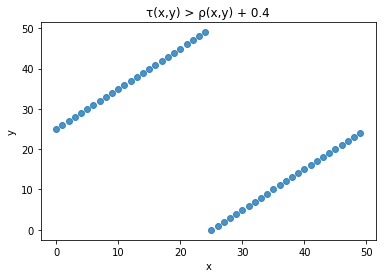

,x,y
0,0,25
1,1,26
2,2,27
3,3,28
4,4,29
5,5,30
6,6,31
7,7,32
8,8,33
9,9,34


In [1643]:
n = 50
n_cut = 25
x = np.arange(n)
y = np.concatenate((x[n_cut:],x[:-n_cut]))

k = ss.kendalltau(x,y)[0]
s = ss.spearmanr(x,y)[0]
num = 0.4


# check
print('τ(x,y) > ρ(x,y) + ({0})  ==>>  '.format(num) + '{0} > {1} + ({2})  ==>> '.format(k,s,num)  + '{0}'.format(k>s+num))

# plot
ax = sns.regplot(x=x,y=y,fit_reg=False)
ax.set(xlabel='x', ylabel='y')
plt.title('τ(x,y) > ρ(x,y) + 0.4')
plt.show()

# table
pd.DataFrame(data=[x,y],index=['x','y']).T

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.4 

τ(x,y) < ρ(x,y) + (-0.4)  ==>>  0.29469387755102044 < 0.7091956782713085 + (-0.4)  ==>> True


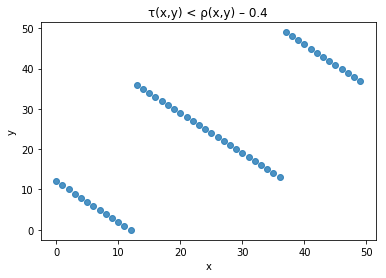

,x,y
0,0,12
1,1,11
2,2,10
3,3,9
4,4,8
5,5,7
6,6,6
7,7,5
8,8,4
9,9,3


In [1644]:
n = 50
n_cut = 13
x = np.arange(n)
y = np.flip(np.concatenate((x[-n_cut:],x[n_cut:-n_cut],x[:n_cut])),axis=0)

k = ss.kendalltau(x,y)[0]
s = ss.spearmanr(x,y)[0]
num = -0.4

# check
print('τ(x,y) < ρ(x,y) + ({0})  ==>>  '.format(num) + '{0} < {1} + ({2})  ==>> '.format(k,s,num)  + '{0}'.format(k<s+num))

# plot
ax = sns.regplot(x=x,y=y,fit_reg=False)
ax.set(xlabel='x', ylabel='y')
plt.title('τ(x,y) < ρ(x,y) – 0.4')
plt.show()

# table
pd.DataFrame(data=[x,y],index=['x','y']).T

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

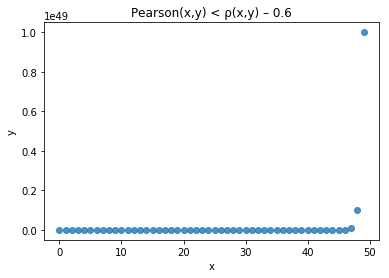

τ(x,y) < ρ(x,y) + (-0.6)  ==>>  0.26752451941483046 < 0.9999999999999999 + (-0.6)  ==>> True


,x,y
0,0.0,1.000000e+00
1,1.0,1.000000e+01
2,2.0,1.000000e+02
3,3.0,1.000000e+03
4,4.0,1.000000e+04
5,5.0,1.000000e+05
6,6.0,1.000000e+06
7,7.0,1.000000e+07
8,8.0,1.000000e+08
9,9.0,1.000000e+09


In [1639]:
n = 50

x = np.arange(n)
y = np.power(10.,x) # everything above 2.1 will work in this way

p = ss.pearsonr(x,y)[0]
s = ss.spearmanr(x,y)[0]
num = -0.6


# check
print('τ(x,y) < ρ(x,y) + ({0})  ==>>  '.format(num) + '{0} < {1} + ({2})  ==>> '.format(p,s,num)  + '{0}'.format(p<s+num))

# plot
ax = sns.regplot(x=x,y=y,fit_reg=False)
ax.set(xlabel='x', ylabel='y')
plt.title('Pearson(x,y) < ρ(x,y) – 0.6')
plt.show()

# table
pd.DataFrame(data=[x,y],index=['x','y']).T

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 1.2

τ(x,y) < ρ(x,y) + (-1.2)  ==>>  -0.7103019728340303 < 0.8823529411764706 + (-1.2)  ==>> True


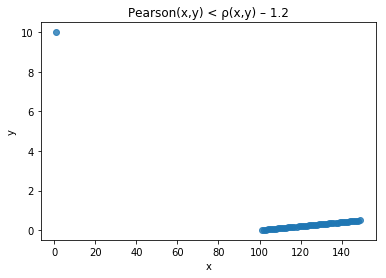

,x,y
0,1.0,10.00
1,101.0,0.01
2,102.0,0.02
3,103.0,0.03
4,104.0,0.04
5,105.0,0.05
6,106.0,0.06
7,107.0,0.07
8,108.0,0.08
9,109.0,0.09


In [1645]:
n = 50

x = np.arange(n)+100
y = np.arange(n)/100
x[0] = 1
y[0] = 10

p = ss.pearsonr(x,y)[0]
s = ss.spearmanr(x,y)[0]
num = -1.2

# check
print('τ(x,y) < ρ(x,y) + ({0})  ==>>  '.format(num) + '{0} < {1} + ({2})  ==>> '.format(p,s,num)  + '{0}'.format(p<s+num))

# plot
ax = sns.regplot(x=x,y=y,fit_reg=False)
ax.set(xlabel='x', ylabel='y')
plt.title('Pearson(x,y) < ρ(x,y) – 1.2')
plt.show()

# table
pd.DataFrame(data=[x,y],index=['x','y']).T

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

##### Answer:

At the beginning, I assumed I could create such a difference between these two types of correlations - Kendall and Spearman.    
After a while, I understood and concluded(!) that a differnce bigger then one won't be possible.

This is an example for a reletive "big difference" between the two:

In [1795]:
n = 50
n_cut = 13

x = np.arange(n)
y = np.flip(np.concatenate((x[-n_cut:],x[n_cut:-n_cut],x[:n_cut])),axis=0)


k = ss.kendalltau(x,y)[0]
s = ss.spearmanr(x,y)[0]
num = -1.2

print('τ(x,y) < ρ(x,y) + ({0})  ==>>  '.format(num) + '{0} < {1} + ({2})  ==>> '.format(k,s,num)  + '{0}'.format(k<s+num))

# pd.DataFrame(data=[x,y],index=['x','y']).T

τ(x,y) < ρ(x,y) + (-1.2)  ==>>  0.29469387755102044 < 0.7091956782713085 + (-1.2)  ==>> False


<br><br><br><br><br>
<br><br><br><br><br>
<br><br><br><br><br>




### Question 2 - Analysis of the Indian Liver Patient Dataset (50 points)

Perform data analysis on the Indian Liver Patient Dataset
References:
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Comparative Study of Liver Patients from USA and INDIA: An Exploratory Analysis, International Journal of Computer Science Issues, ISSN :1694-0784, May 2012. 
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Study of Selected Classification Algorithms for Liver Disease Diagnosis, International Journal of Database Management Systems (IJDMS), Vol.3, No.2, ISSN : 0975-5705, PP 101-114, May 2011.

Use the following link to find the details of the data: https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

In the follwong cells write a report for your analysis.    
In your report provide a clear description of the analysis methods and of the results.    
This should include a graphical representation of the results and the conclusions.  
Provide p-values or other indicators of the statistical significance where appropriate.    

Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median value of the relevant feature (column).

Address the following questions:
* Using confidence intervals determine features for which you can state with confidence of 95% that the healthy population mean is larger/smaller than the disease population mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


##### Load the dataset

In [937]:
cols = 'age,gender,totalBilirubin,directBilirubin,totalProteins,albumin,A/Gratio,SGPT,SGOT,Alkphos,Target'.split(',')
# 1. Age Age of the patient
# 2. Gender Gender of the patient
# 3. TB Total Bilirubin
# 4. DB Direct Bilirubin
# 5. Alkphos Alkaline Phosphotase
# 6. Sgpt Alamine Aminotransferase
# 7. Sgot Aspartate Aminotransferase
# 8. TP Total Protiens
# 9. ALB Albumin
# 10. A/G Ratio Albumin and Globulin Ratio
# 11. Selector field used to split the data into two sets (labeled by the experts): 1-is liver patient 2-non liver patient 

df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',header=None,names=cols,index_col=False)
df.head()

,age,gender,totalBilirubin,directBilirubin,totalProteins,albumin,A/Gratio,SGPT,SGOT,Alkphos,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


###### There are missing values in the data. Find them and impute them by using the median value of the relevant feature (column).

In [940]:
df.fillna(df.median(),inplace=True)

###### Using confidence intervals determine features for which you can state with confidence of 95% that the healthy population mean is larger/smaller than the disease population mean.

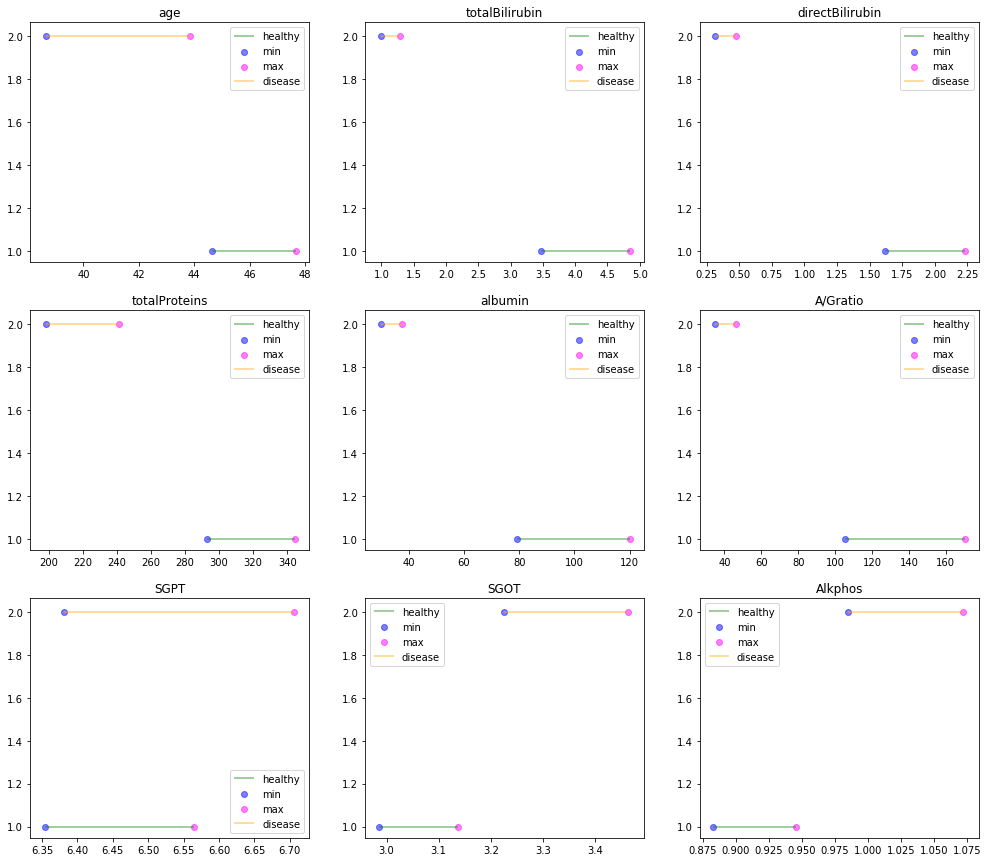


Features which I can state with confidence of 95% that the healthy population mean is larger than the disease population mean: 
age, totalBilirubin, directBilirubin, totalProteins, albumin, A/Gratio

Features which I can state with confidence of 95% that the healthy population mean is smaller than the disease population mean: 
SGOT, Alkphos


In [1111]:
# helper function
def df_confidence_interval(df,confidence=0.95):
    n = df.count()
    mean = df.mean()
    sem = df.sem()
    h = sem * ss.t.ppf( (1 + confidence)/2, n - 1)
    return mean-h , mean+h

# df by target
df_healthy = df[df.Target==1].drop(['Target','gender'],axis=1)
df_disease = df[df.Target==2].drop(['Target','gender'],axis=1)

# df confidence interval by target
ci_healthy = df_confidence_interval(df_healthy)
ci_disease = df_confidence_interval(df_disease)


# plot 
plt.figure(figsize=(17,15))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.hlines(y=1, xmin=ci_healthy[0][i-1], xmax=ci_healthy[1][i-1], alpha=0.5,color='green',label='healthy')
    plt.scatter(ci_healthy[0][i-1], 1, color='blue', alpha=0.5, label='min')
    plt.scatter(ci_healthy[1][i-1], 1, color='magenta', alpha=0.5 , label='max')
    plt.hlines(y=2, xmin=ci_disease[0][i-1], xmax=ci_disease[1][i-1], alpha=0.5,color='orange',label='disease')
    plt.scatter(ci_disease[0][i-1], 2, color='blue', alpha=0.5)
    plt.scatter(ci_disease[1][i-1], 2, color='magenta', alpha=0.5)
    plt.title(ci_healthy[0].index[i-1])
    plt.legend()    

plt.show()


# print result
print()
print('Features which I can state with confidence of 95% that the healthy population mean is larger than the disease population mean: ')
print(', '.join(ci_healthy[0].index[ci_disease[1]<ci_healthy[0]].values))
print()
print('Features which I can state with confidence of 95% that the healthy population mean is smaller than the disease population mean: ')
print(', '.join(ci_healthy[0].index[ci_healthy[1]<ci_disease[0]].values))


##### Draw histograms for each numerical feature.

<Figure size 1296x1080 with 0 Axes>

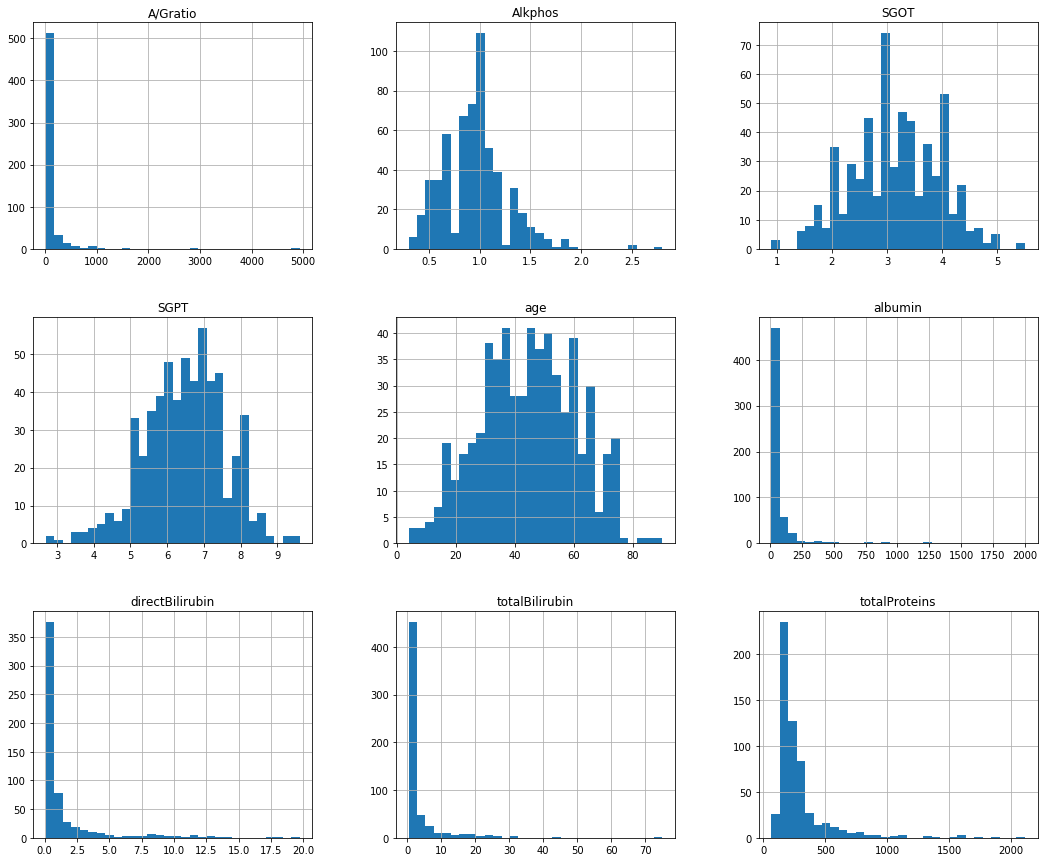

In [1891]:
plt.figure(figsize=(18,15))
df.drop('Target',1).hist(figsize=(18,15),bins=30)
plt.show()

##### Quick Check:
Only col 'totalProteins' is kinda unclear. Let's look closely.

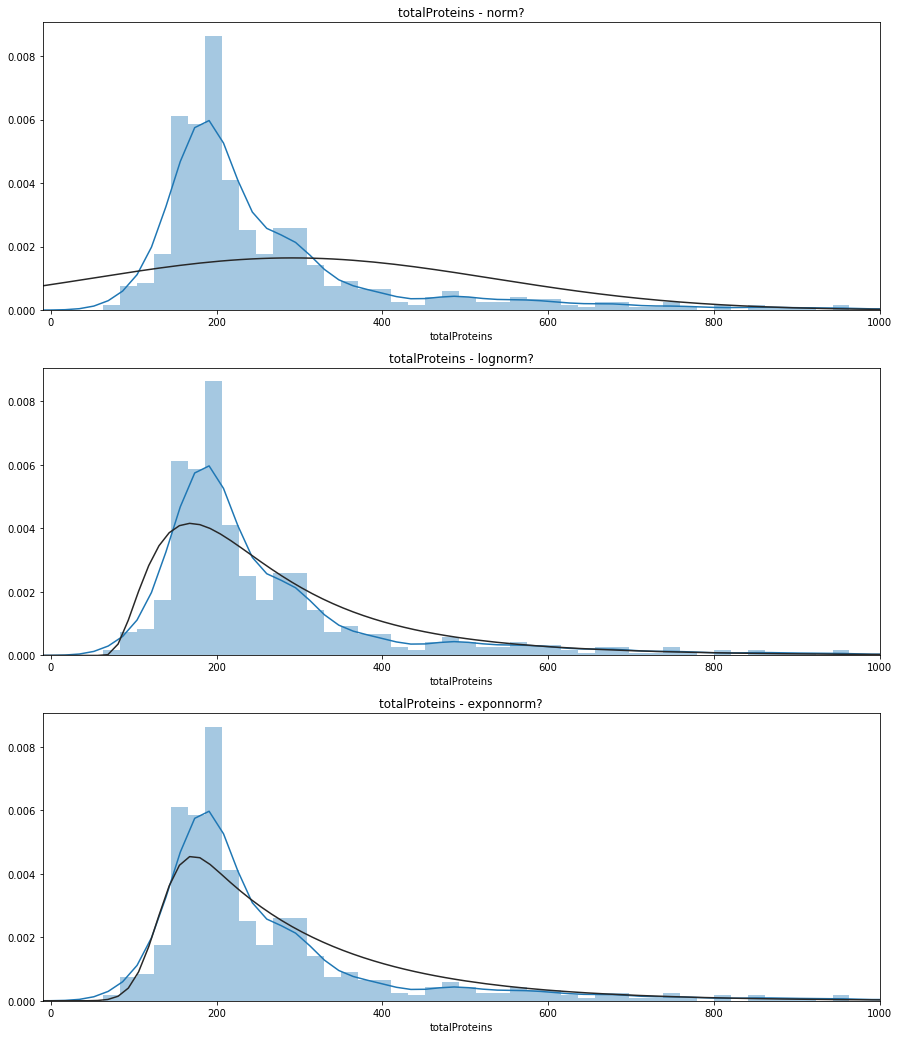

In [1890]:
bins = 100
plt.figure(figsize=(15,18))


plt.subplot(3, 1, 1)
plt.xlim(-10, 1000)
plt.title('totalProteins - norm?')
sns.distplot(df['totalProteins'],kde=True,label='data',norm_hist=True,fit=ss.norm,bins=bins)

plt.subplot(3, 1, 2)
plt.xlim(-10, 1000)
plt.title('totalProteins - lognorm?')
sns.distplot(df['totalProteins'],kde=True,label='data',norm_hist=True,fit=ss.lognorm,bins=bins)

plt.subplot(3, 1, 3)
plt.xlim(-10, 1000)
plt.title('totalProteins - exponnorm?')
sns.distplot(df['totalProteins'],kde=True,label='data',norm_hist=True,fit=ss.exponnorm,bins=bins)

I belive it's more like lognorm (or perhaps like exponnorm).

##### Important Note:   
In the real word I would be observing the distributions sepretly for healthy and disease.  
And only them I would be able to assume they are destirbuting in the same manner.   
Due to this is an exrcise I did as instructed.

But just in case, let me check if some distributions are changing?

In [1929]:
df_healthy = df[df.Target==1]
df_disease = df[df.Target==2]

bins = 100

<Figure size 1080x7200 with 0 Axes>

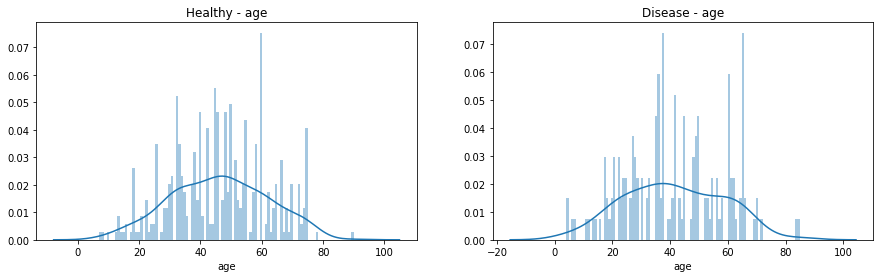

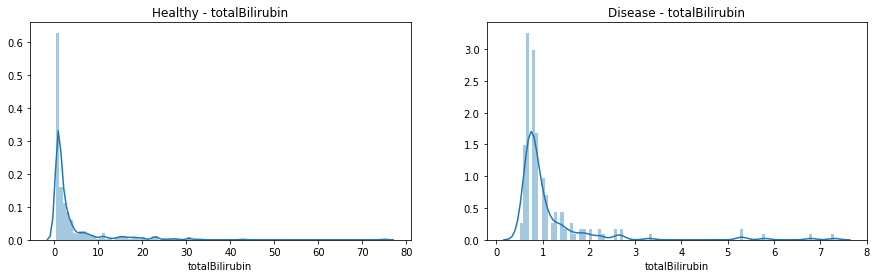

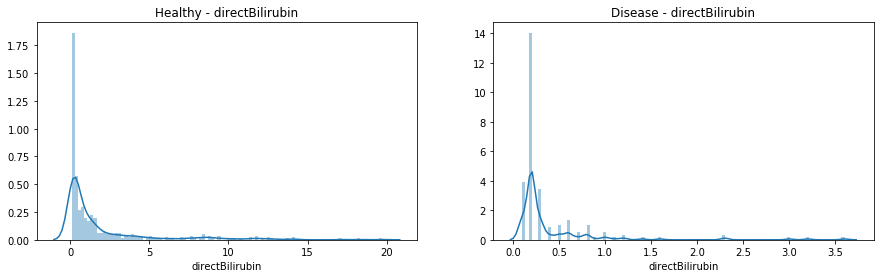

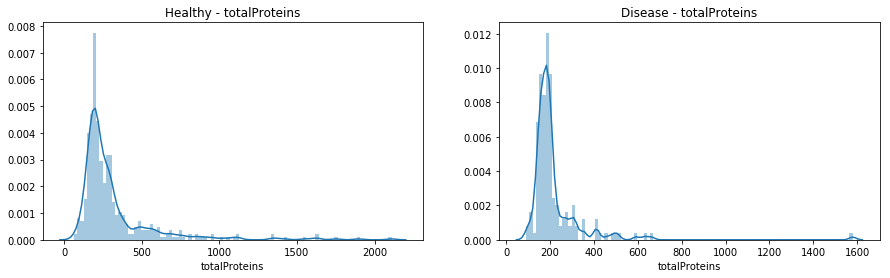

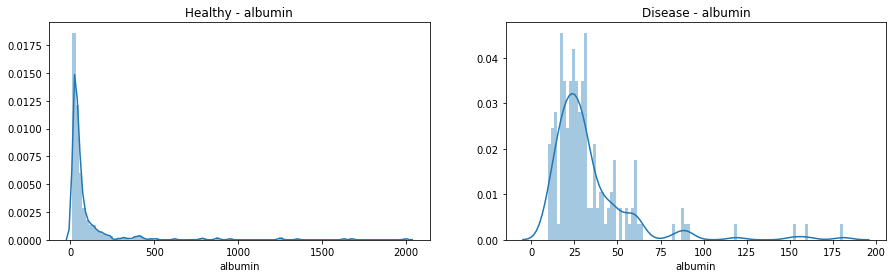

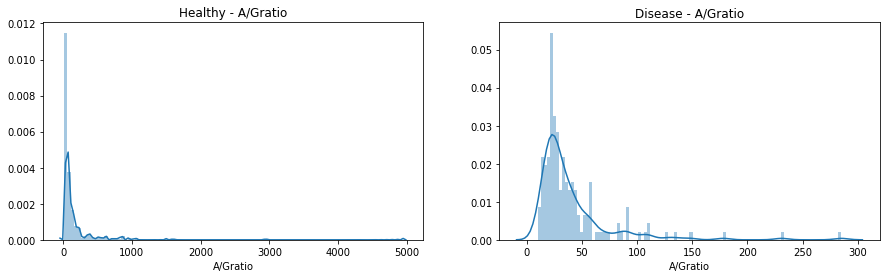

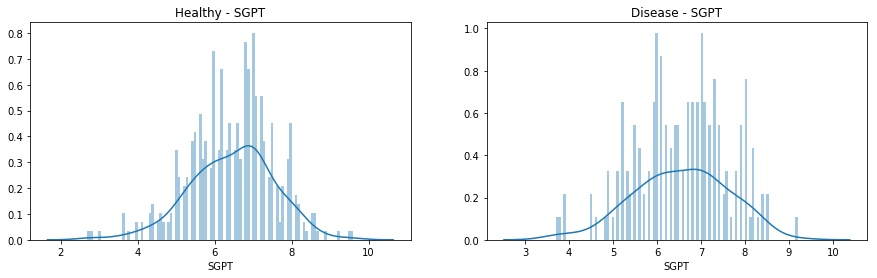

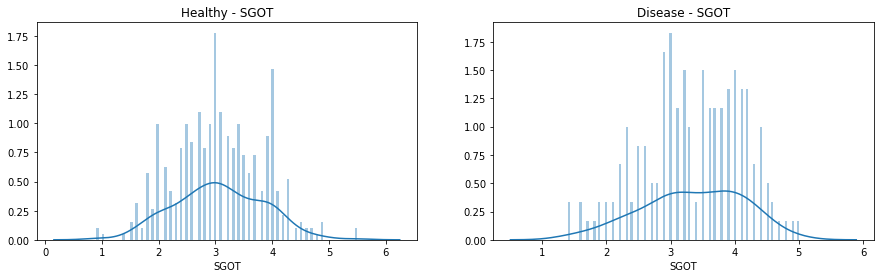

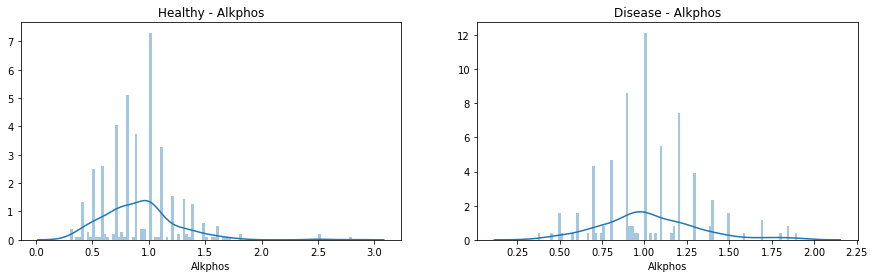

In [1932]:
plt.figure(figsize=(15,100))

for col in df.drop(['gender','Target'],1):

    plt.subplots(1, 2, figsize = (15,4))

    plt.subplot(1, 2, 1)
    plt.title('Healthy - ' + col)
    sns.distplot(df_healthy[col],kde=True,label='data',norm_hist=True,bins=bins)
    
    plt.subplot(1, 2, 2)
    plt.title('Disease - ' + col)
    sns.distplot(df_disease[col],kde=True,label='data',norm_hist=True,bins=bins)
    
    plt.show()

Now I finally can answer this question...

#### Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.

In [1991]:
cols = ['age', 'totalBilirubin', 'directBilirubin', 'totalProteins','albumin', 'A/Gratio', 'SGPT', 'SGOT', 'Alkphos']

distributions = {}

for col in cols:
    distributions[col] = {}
    distributions[col]['healthy'] = ''
    distributions[col]['disease'] = ''
    
distributions['age']['healthy'] = 'normal'
distributions['age']['disease'] = 'normal'

distributions['totalBilirubin']['healthy'] = 'lognormal'
distributions['totalBilirubin']['disease'] = 'lognormal'

distributions['directBilirubin']['healthy'] = 'gausshyper'
distributions['directBilirubin']['disease'] = 'lognormal'

distributions['totalProteins']['healthy'] = 'lognormal'
distributions['totalProteins']['disease'] = 'gamma'

distributions['albumin']['healthy'] = 'exponential'
distributions['albumin']['disease'] = 'normal'

distributions['A/Gratio']['healthy'] = 'gausshyper'
distributions['A/Gratio']['disease'] = 'lognormal'

distributions['SGPT']['healthy'] = 'normal'
distributions['SGPT']['disease'] = 'normal'

distributions['SGOT']['healthy'] = 'normal'
distributions['SGOT']['disease'] = 'normal'

distributions['Alkphos']['healthy'] = 'normal' # with few outliers
distributions['Alkphos']['disease'] = 'normal' 

def get_fit(argument): 
    switcher = { 
        'normal': ss.norm, 
        'lognormal': ss.lognorm, 
        'exponential' : ss.expon,
        'gausshyper': ss.gausshyper,
        'gamma': ss.gamma,
    } 
    return switcher.get(argument, "nothing")

<Figure size 1080x7200 with 0 Axes>

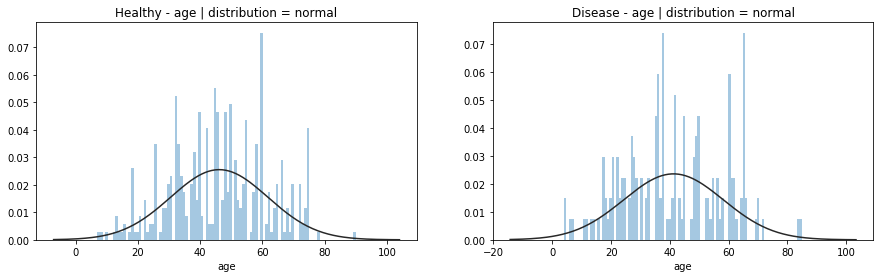

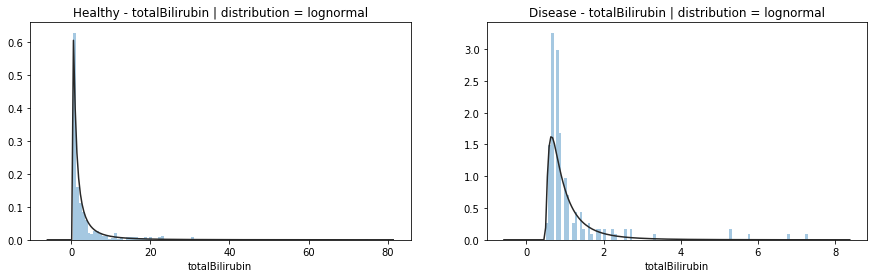

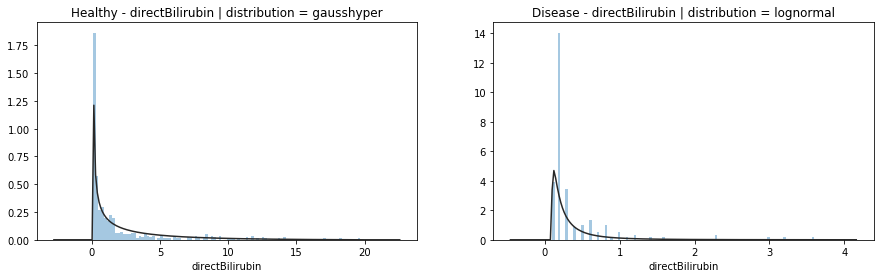

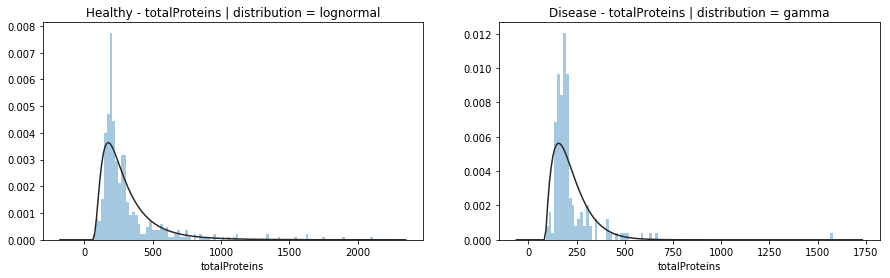

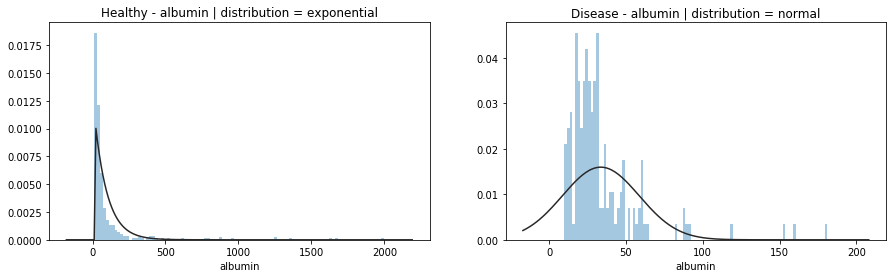

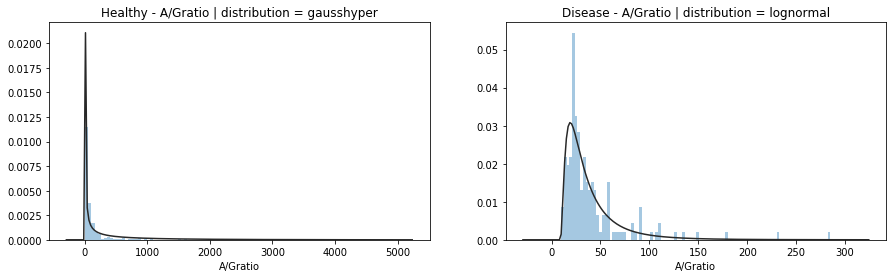

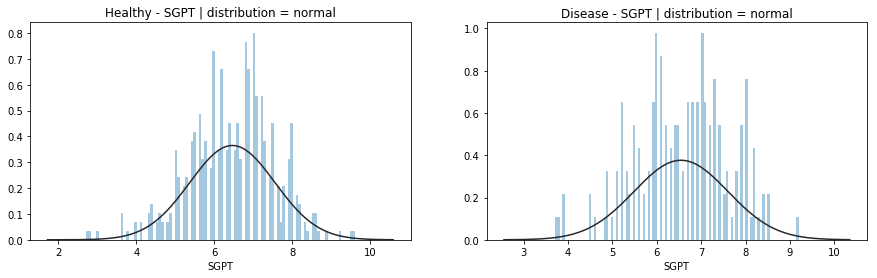

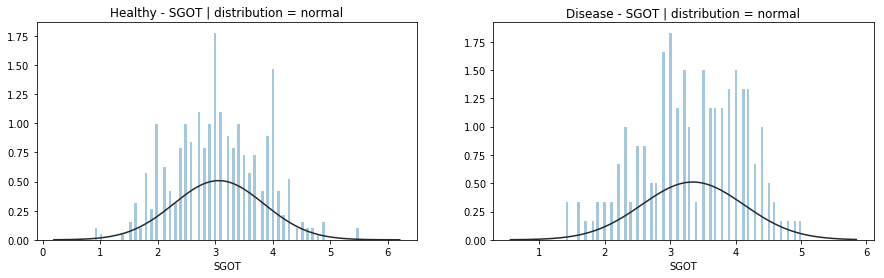

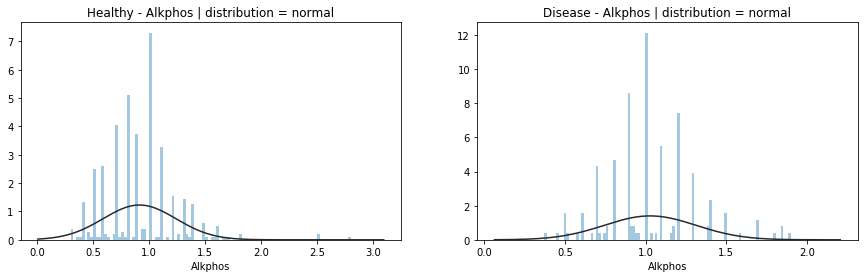

In [1992]:
plt.figure(figsize=(15,100))

for col in df.drop(['gender','Target'],1):

    plt.subplots(1, 2, figsize = (15,4))

    plt.subplot(1, 2, 1)
    plt.title('Healthy - ' + col + ' | distribution = ' + distributions[col]['healthy'])
    sns.distplot(df_healthy[col],kde=False,label='data',norm_hist=True,bins=bins,fit=get_fit(distributions[col]['healthy']))
    
    plt.subplot(1, 2, 2)
    plt.title('Disease - ' + col + ' | distribution = ' + distributions[col]['disease'])
    sns.distplot(df_disease[col],kde=False,label='data',norm_hist=True,bins=bins,fit=get_fit(distributions[col]['disease']))
    
    plt.show()

##### Note:
I'm very unhappy with the resulted distribution of:
- healthy directBilirubin
- disease totalProteins
- disease albumin
And I was very much conflicted with numerous distrebutions like: normal, lognormal, gamma etc.

Nevertheless, I choose these ones, because I personelly felt like they are reflecting the data the most.  
But in the real world I would remove some outliers or sample more data in order to create a much more fitted distribution.

## Correlations

##### For each pair of numerical feature, calculate correlations and indicate whether you find them significant. 

Just to get a fill on the data - I'll run a pair plot on everything...

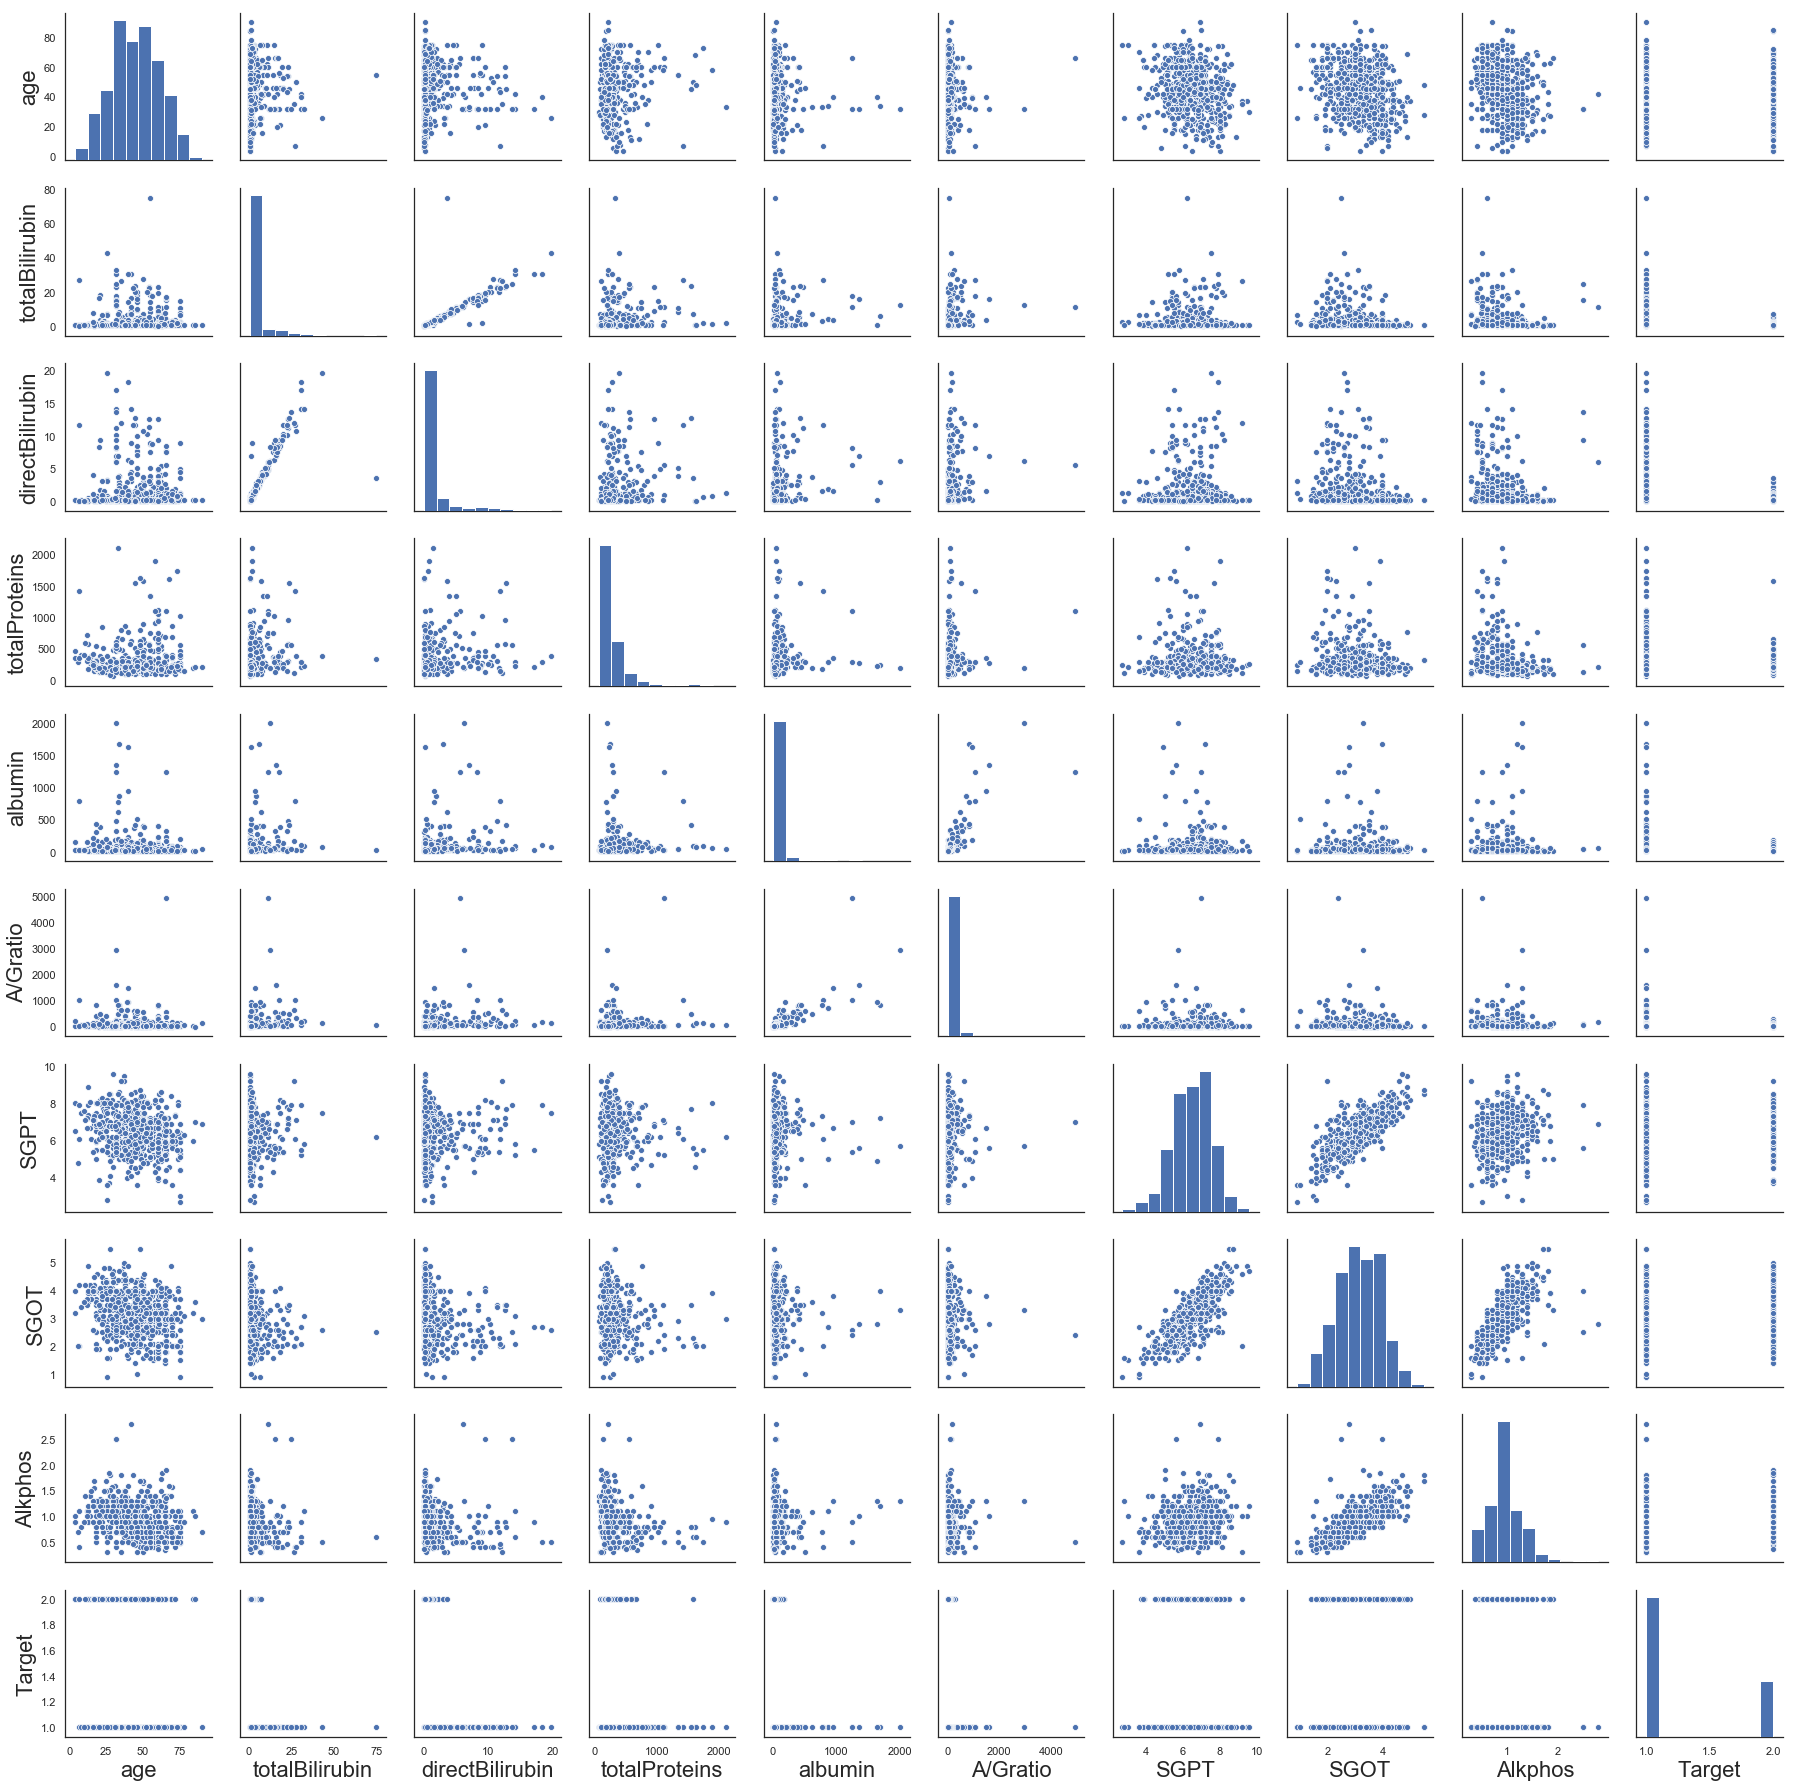

In [2275]:
sns.pairplot(df) 
# did not want to use kind='reg' in this initial stage

I can see that there are features that are strongly correlated. good!

I'll use all the correletions learnd in class, and try to find a few significant correlations.

In [2269]:
df.corr(method='pearson')

,age,totalBilirubin,directBilirubin,totalProteins,albumin,A/Gratio,SGPT,SGOT,Alkphos,Target
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.215968,-0.137351
totalBilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206015,-0.220208
directBilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199850,-0.246046
totalProteins,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233784,-0.184866
albumin,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002254,-0.163416
A/Gratio,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069930,-0.151934
SGPT,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233828,0.035008
SGOT,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686091,0.161388
Alkphos,-0.215968,-0.206015,-0.199850,-0.233784,-0.002254,-0.069930,0.233828,0.686091,1.000000,0.162144
Target,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162144,1.000000


In [2270]:
df.corr(method='kendall')

,age,totalBilirubin,directBilirubin,totalProteins,albumin,A/Gratio,SGPT,SGOT,Alkphos,Target
age,1.000000,0.078099,0.074733,0.038868,-0.046261,-0.013206,-0.120690,-0.180176,-0.177233,-0.107040
totalBilirubin,0.078099,1.000000,0.898136,0.270267,0.306483,0.361626,-0.014417,-0.153281,-0.203857,-0.255635
directBilirubin,0.074733,0.898136,1.000000,0.265809,0.292416,0.364823,-0.015559,-0.164638,-0.219248,-0.256279
totalProteins,0.038868,0.270267,0.265809,1.000000,0.277939,0.264168,0.010076,-0.115934,-0.227488,-0.223921
albumin,-0.046261,0.306483,0.292416,0.277939,1.000000,0.596488,-0.012909,-0.033134,-0.055750,-0.239269
A/Gratio,-0.013206,0.361626,0.364823,0.264168,0.596488,1.000000,-0.057158,-0.137458,-0.145750,-0.253705
SGPT,-0.120690,-0.014417,-0.015559,0.010076,-0.012909,-0.057158,1.000000,0.613098,0.192200,0.026685
SGOT,-0.180176,-0.153281,-0.164638,-0.115934,-0.033134,-0.137458,0.613098,1.000000,0.592970,0.138960
Alkphos,-0.177233,-0.203857,-0.219248,-0.227488,-0.055750,-0.145750,0.192200,0.592970,1.000000,0.158933
Target,-0.107040,-0.255635,-0.256279,-0.223921,-0.239269,-0.253705,0.026685,0.138960,0.158933,1.000000


In [2271]:
df.corr(method='spearman')

,age,totalBilirubin,directBilirubin,totalProteins,albumin,A/Gratio,SGPT,SGOT,Alkphos,Target
age,1.000000,0.113827,0.106473,0.059205,-0.067737,-0.018285,-0.174271,-0.260791,-0.249477,-0.129572
totalBilirubin,0.113827,1.000000,0.959216,0.383794,0.436586,0.508869,-0.019252,-0.222184,-0.284191,-0.303879
directBilirubin,0.106473,0.959216,1.000000,0.367818,0.412322,0.504138,-0.019987,-0.232664,-0.297330,-0.297270
totalProteins,0.059205,0.383794,0.367818,1.000000,0.410752,0.395732,0.014028,-0.170809,-0.321058,-0.273247
albumin,-0.067737,0.436586,0.412322,0.410752,1.000000,0.773611,-0.018811,-0.052673,-0.082884,-0.290709
A/Gratio,-0.018285,0.508869,0.504138,0.395732,0.773611,1.000000,-0.084779,-0.204867,-0.208769,-0.308897
SGPT,-0.174271,-0.019252,-0.019987,0.014028,-0.018811,-0.084779,1.000000,0.779077,0.272467,0.032220
SGOT,-0.260791,-0.222184,-0.232664,-0.170809,-0.052673,-0.204867,0.779077,1.000000,0.751189,0.167079
Alkphos,-0.249477,-0.284191,-0.297330,-0.321058,-0.082884,-0.208769,0.272467,0.751189,1.000000,0.187332
Target,-0.129572,-0.303879,-0.297270,-0.273247,-0.290709,-0.308897,0.032220,0.167079,0.187332,1.000000


But even one type of correlation seems like it's too much information.   
So I'll focus on correlations with a high p-value and a higher pearson correlation then 0.5.

In [2272]:
# get intresting pairs

cols = df.drop('gender',1).columns
pairs = []

for col1 in cols:
    cols = cols.drop(col1)
    for col2 in cols:
        cor,pval = ss.pearsonr(df[col1],df[col2])
        if((abs(cor)>=0.5) and (abs(pval)<=0.05)):
            pairs.append((col1,col2))  
pairs

[('totalBilirubin', 'directBilirubin'),
 ('albumin', 'A/Gratio'),
 ('SGPT', 'SGOT'),
 ('SGOT', 'Alkphos')]

Jointplots of intresting pairs:


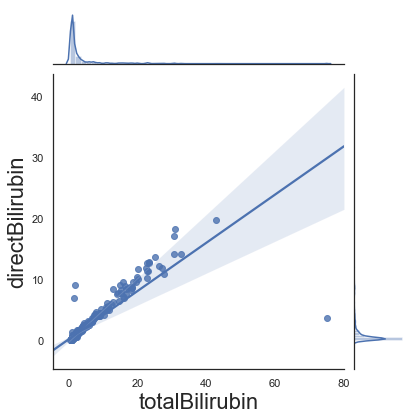

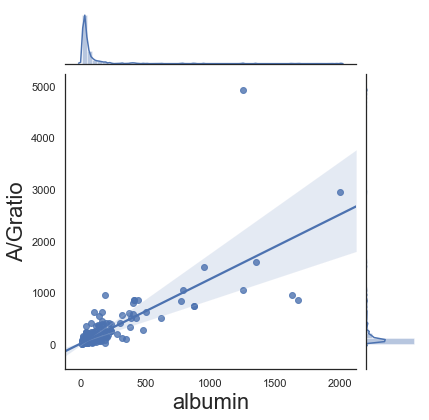

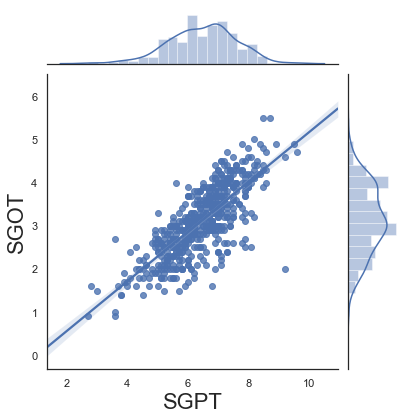

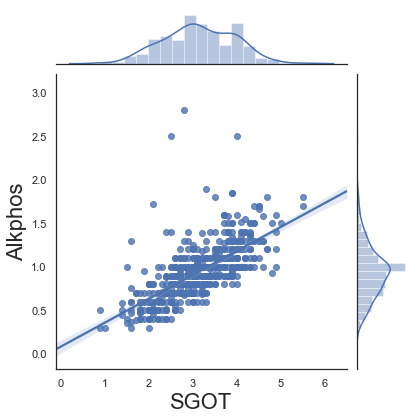

In [2273]:
print('Jointplots of intresting pairs:')

for pair in pairs:
    sns.jointplot(df[pair[0]],df[pair[1]],kind='reg')

FYI, I overwrite the given function to suit my needs...

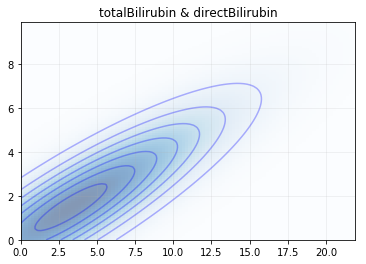

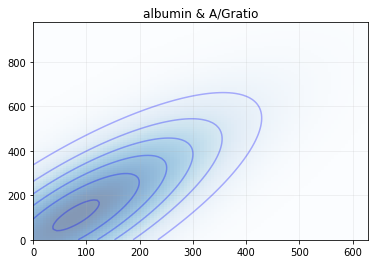

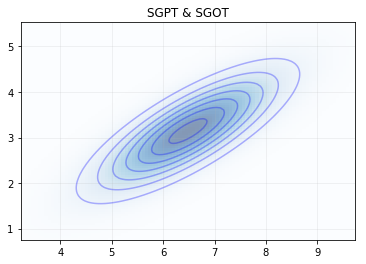

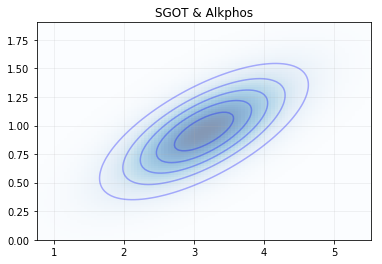

In [2092]:

def plot_2d_Gaussian_pdf(title,means, cov):
    n = 100
    x1 = np.linspace(max(0, means[0] - 3 * np.sqrt(cov[0][0])), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(max(0, means[1] - 3 * np.sqrt(cov[1][1])), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = ss.multivariate_normal.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               alpha=0.3, colors='b')
    ax.grid(alpha=0.2)
    plt.title(title)
    plt.show()

for pair in pairs:
    cov_mat = np.cov(df[pair[0]], df[pair[1]])
    mean_vec= np.array(df[[pair[0], pair[1]]].mean())
    plot_2d_Gaussian_pdf(pair[0] + ' & ' + pair[1],mean_vec, cov_mat)

#### Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?

##### Male VS Female
Separate the data:

In [2193]:
df_female = df[df.gender=='Female'].select_dtypes(np.number)
df_male = df[df.gender=='Male'].select_dtypes(np.number)

Create a pair plot:

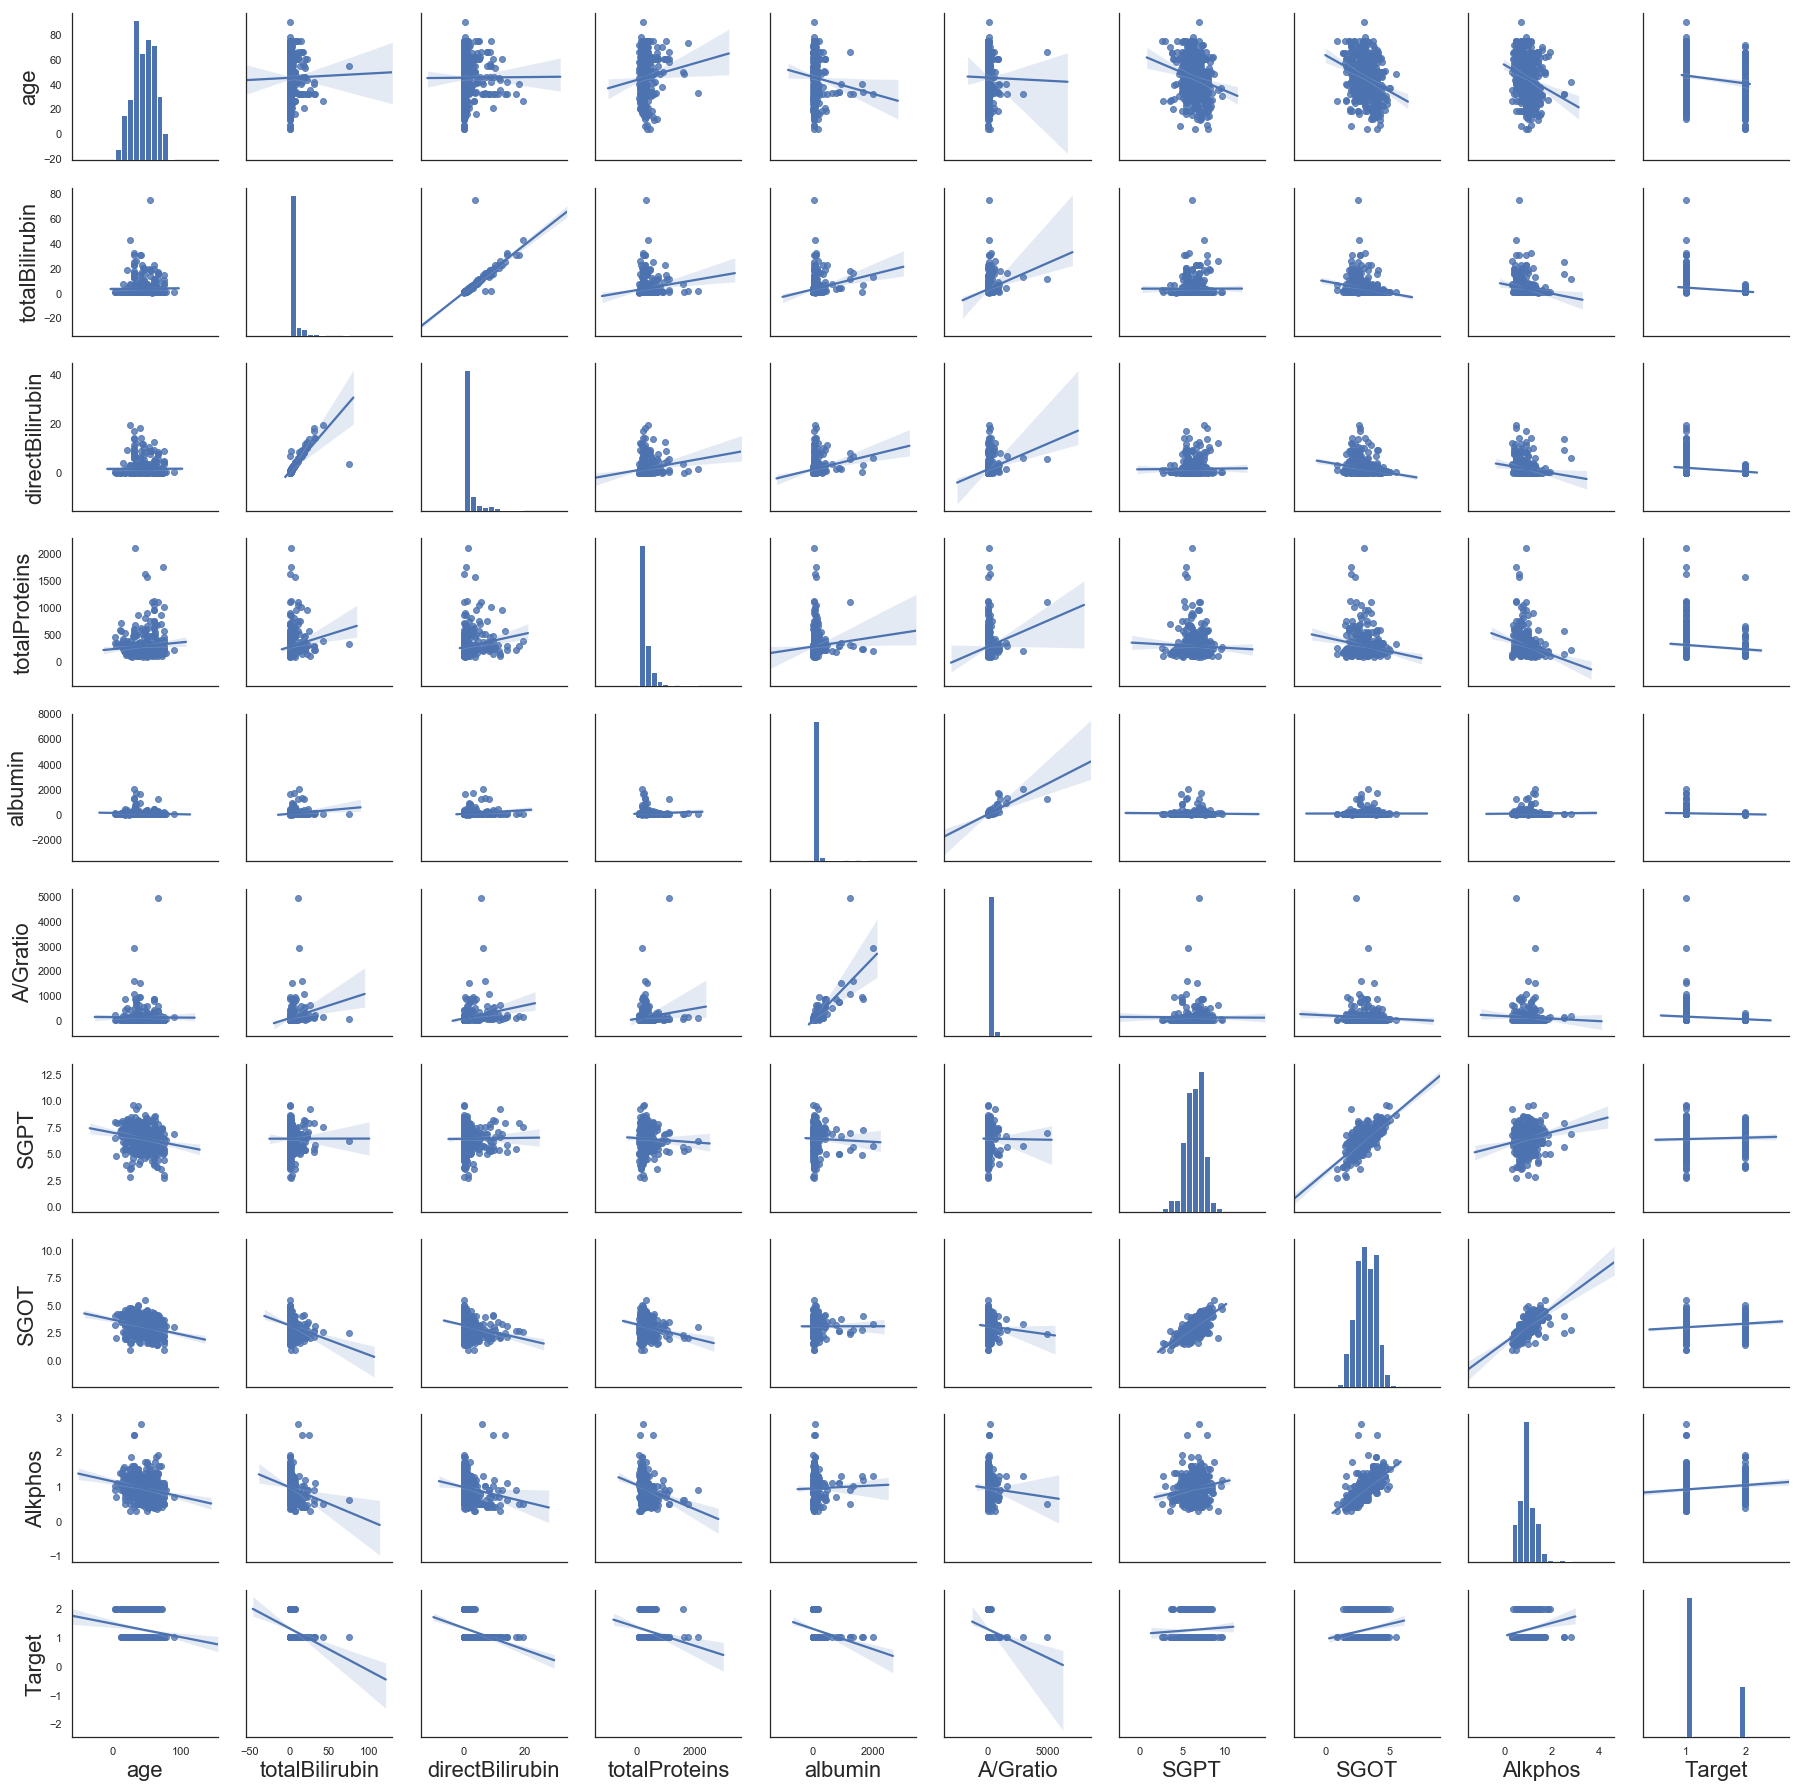

In [2194]:
sns.set_context(rc={"axes.labelsize":22})
sns.pairplot(df_male,kind='reg')

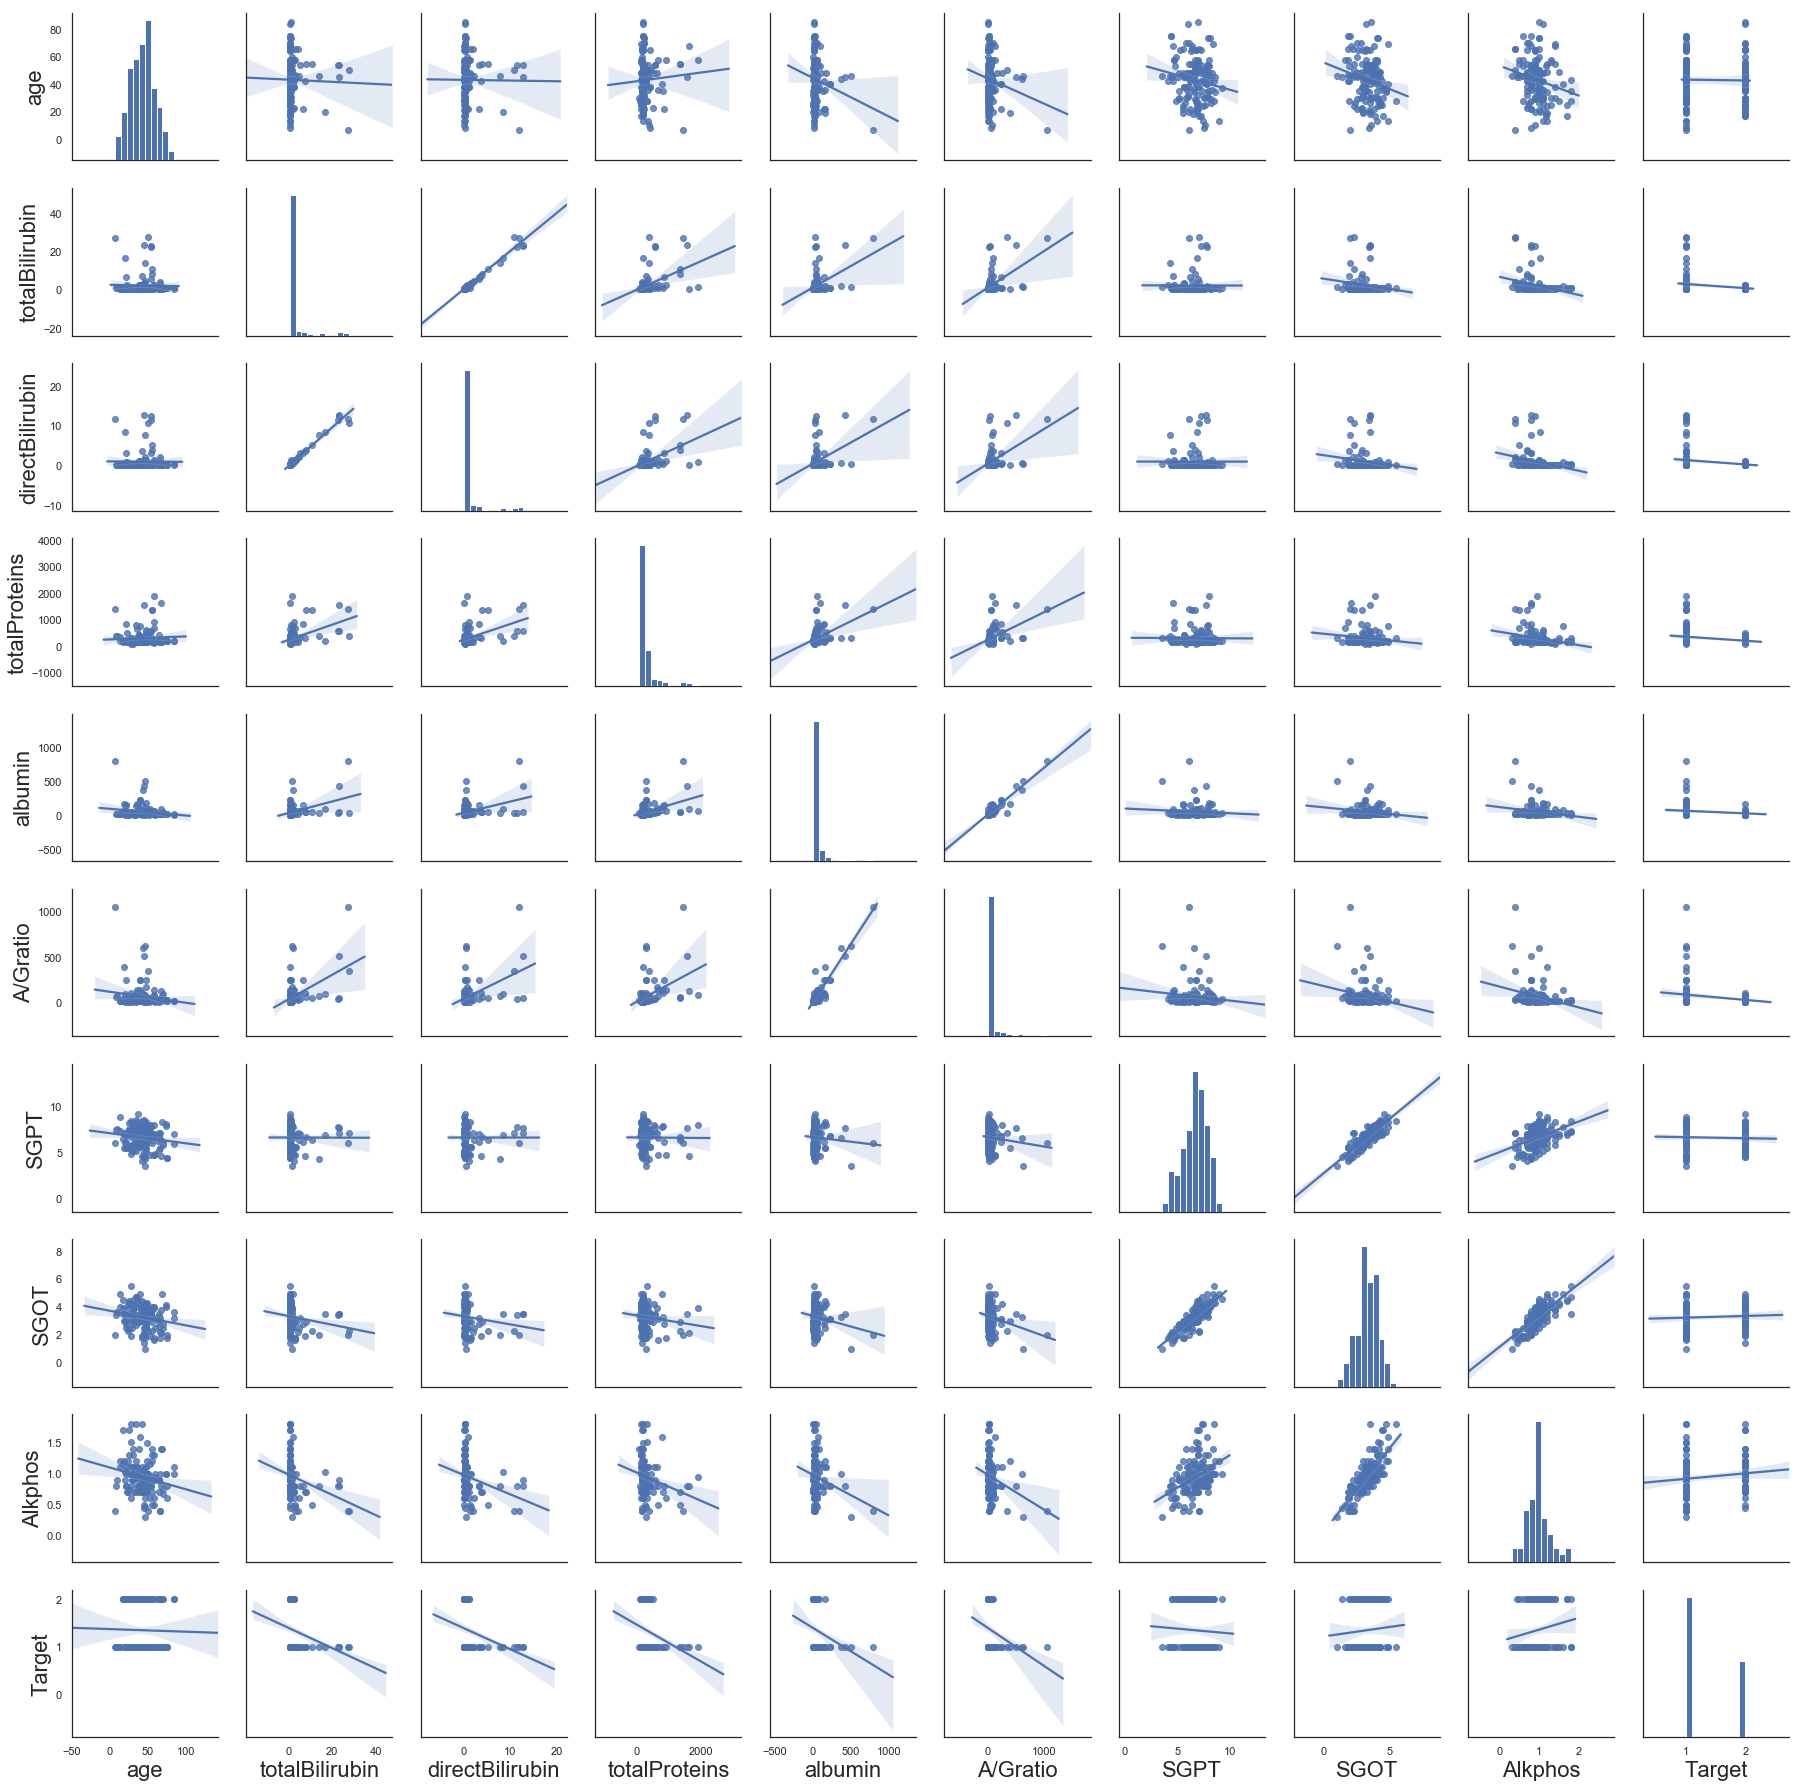

In [2195]:
sns.set_context(rc={"axes.labelsize":22})
sns.pairplot(df_female,kind='reg')

##### So there are trends in the data that behave differently. let's chack it out..
- checking for significant coorelation in a pair that apears only in one gender with a good p-value
- checking for coorelation vs almost no correlation at all with a good p-value
- checking for significant correletion difference with a good p-value
- checking for different sign correletion with a good p-value


pair   >>  totalBilirubin A/Gratio
male   >>  0.21019981379216207 8.527348190441897e-06
female >>  0.5110485875872416 8.118275796850847e-11


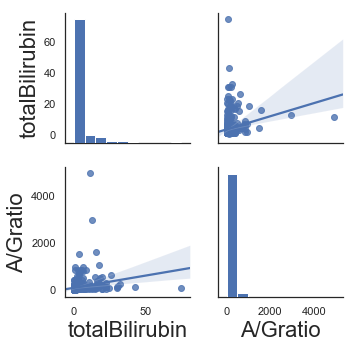

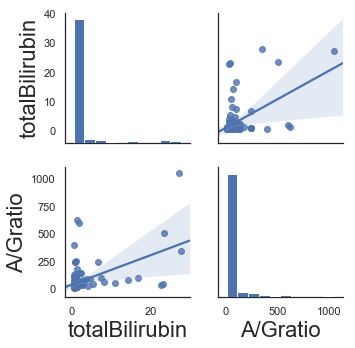

In [2196]:
cols = df_male.columns

pairs = []

for col1 in cols:
    for col2 in cols:
        cor_male,pval_male = ss.pearsonr(df_male[col1],df_male[col2])
        cor_female,pval_female = ss.pearsonr(df_female[col1],df_female[col2])

        condition_no_trends_vs_trens = (abs(cor_male)<0.001 and abs(cor_female)>0.001) or (abs(cor_male)>0.001 and abs(cor_female)<0.001)
        condition_opposite_trends = (cor_male<0 and cor_female>0) or (cor_male>0 and cor_female<0)
        condition_difference = (cor_male<0.5 and cor_female>0.5) or (cor_male>0.5 and cor_female<0.5)
        condition_pval = (pval_male<=0.05 and pval_female<=0.05)
        
        if( (condition_no_trends_vs_trens or condition_opposite_trends or condition_difference) and condition_pval ):
            print('pair   >> ',col1,col2)
            print('male   >> ',cor_male,pval_male)
            print('female >> ',cor_female,pval_female)
            pairs.append((col1,col2))  
            
    cols = cols.drop(col1)

for pair in pairs:
    sns.pairplot(df_male[[pair[0],pair[1]]],kind='reg')
    sns.pairplot(df_female[[pair[0],pair[1]]],kind='reg')


This is good! This pair has a nice correltion difference with a very significant p-value.
<br><br>

As I can see there is a correlation difference of 0.3 with a very good p-value. So the data trend seems to be kinda different. but...

In [2197]:
cor_male,pval_male = ss.kendalltau(df_male[pair[0]],df_male[pair[1]])
cor_female,pval_female = ss.kendalltau(df_female[pair[0]],df_female[pair[1]])

print('pair   >> ',col1,col2)
print('male   >> ',cor_male,pval_male)
print('female >> ',cor_female,pval_female)

pair   >>  Target Target
male   >>  0.35772834673386195 9.040873685657825e-28
female >>  0.3052704813394851 3.8624790343749424e-07


When whatching the a rank type correlation it seems there is almost no difference.

##### In conclution: there are very very very good p-values - but with a small difference in correlation.
<br><br><br><br>

##### Healthy Vs Disease
(almost the same)

pair    >>  totalBilirubin totalProteins
healthy >>  0.16646277360170017 0.0006525301397910305
disease >>  0.5647151282452617 1.8838754791499402e-15

pair    >>  directBilirubin totalProteins
healthy >>  0.19158052711812107 8.416626058053425e-05
disease >>  0.561263605836926 3.0302677972517153e-15



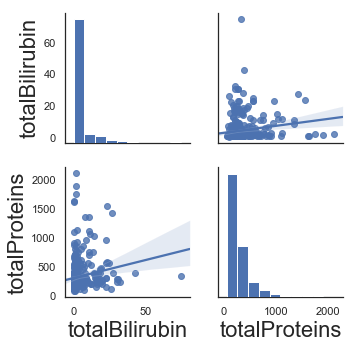

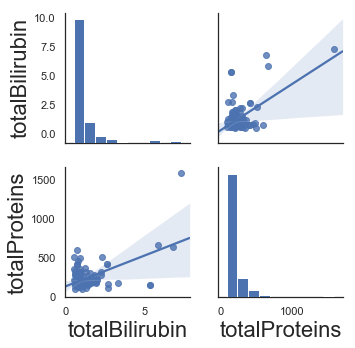

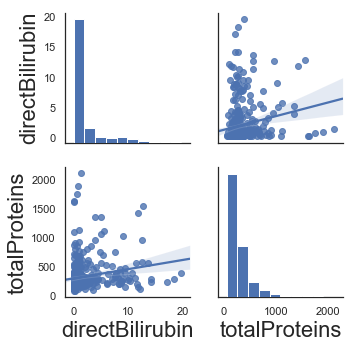

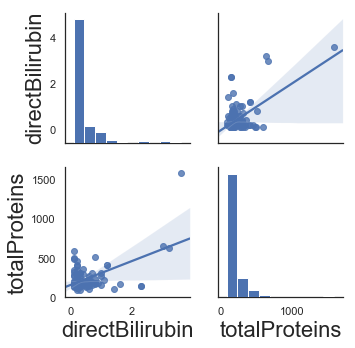

In [2198]:
df_healthy = df[df.Target==1].select_dtypes(np.number)
df_disease = df[df.Target==2].select_dtypes(np.number)

cols = df_healthy.columns

pairs = []

for col1 in cols:
    for col2 in cols:
        cor_healthy,pval_healthy = ss.pearsonr(df_healthy[col1],df_healthy[col2])
        cor_disease,pval_disease = ss.pearsonr(df_disease[col1],df_disease[col2])

        condition_no_trends_vs_trens = (abs(cor_healthy)<0.001 and abs(cor_disease)>0.001) or (abs(cor_healthy)>0.001 and abs(cor_disease)<0.001)
        condition_opposite_trends = (cor_healthy<0 and cor_disease>0) or (cor_healthy>0 and cor_disease<0)
        condition_difference = (cor_healthy<0.5 and cor_disease>0.5) or (cor_healthy>0.5 and cor_disease<0.5)
        condition_pval = (pval_healthy<=0.05 and pval_disease<=0.05)
        
        if( (condition_no_trends_vs_trens or condition_opposite_trends or condition_difference) and condition_pval ):
            print('pair    >> ',col1,col2)
            print('healthy >> ',cor_healthy,pval_healthy)
            print('disease >> ',cor_disease,pval_disease)
            print()
            pairs.append((col1,col2))  
            
    cols = cols.drop(col1)

for pair in pairs:
    sns.pairplot(df_healthy[[pair[0],pair[1]]],kind='reg')
    sns.pairplot(df_disease[[pair[0],pair[1]]],kind='reg')


Looks promising! These pairs have a good correltion difference with a very significant p-value.
<br><br>

let's check it out with a rank type correletion just to be extra sure... 

In [2188]:
 for pair in pairs:
    cor_healthy,pval_healthy = ss.kendalltau(df_healthy[pair[0]],df_healthy[pair[1]])
    cor_disease,pval_disease = ss.kendalltau(df_disease[pair[0]],df_disease[pair[1]])

    print('pair    >> ',pair[0],pair[1])
    print('healthy >> ',cor_healthy,pval_healthy)
    print('disease >> ',cor_disease,pval_disease)
    print()

pair    >>  totalBilirubin totalProteins
healthy >>  0.2660968475692117 2.472011874740908e-15
disease >>  0.06870892634804232 0.21260889067377897

pair    >>  directBilirubin totalProteins
healthy >>  0.2621038577084649 1.8418442680245766e-14
disease >>  0.05828116152899331 0.31166895675066064



Very good! kinda nice difference in trend, and due to a very very good p-value those findings have significant confidence for me.  

##### In conclution: Defenetly worth mentioning that regarding the features mentioned above Healthy data has a trend, but in the Disease data there is almost no trend.  
<br><br><br><br>

#### For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Note: did not state to find the best number of bins to represent the feature's data, nor to use different bins to each feature.

Index(['totalBilirubin', 'directBilirubin', 'totalProteins', 'albumin',
       'A/Gratio', 'SGPT', 'SGOT', 'Alkphos'],
      dtype='object')


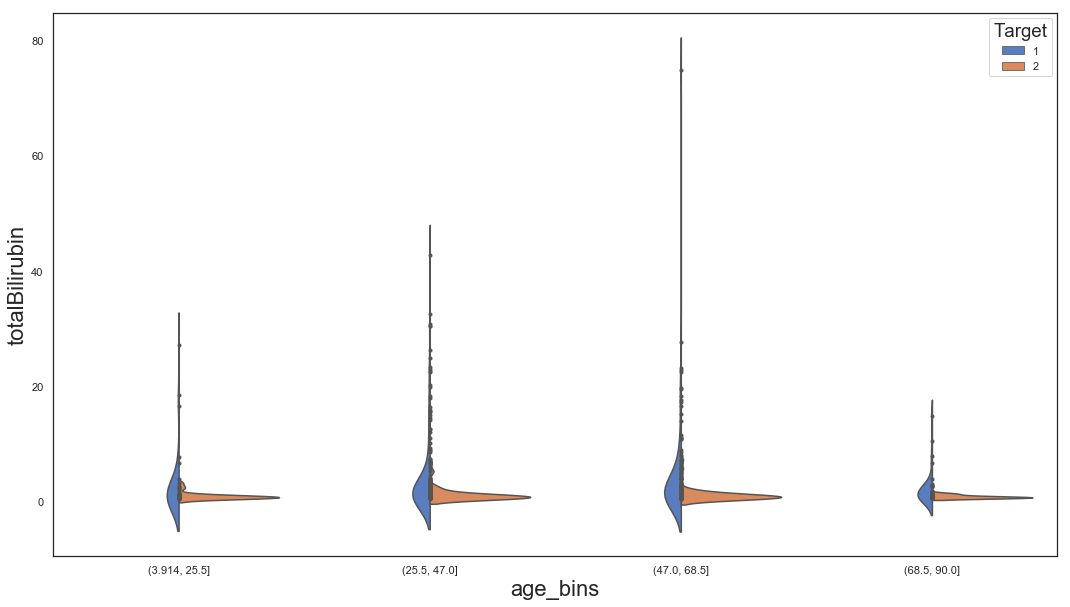

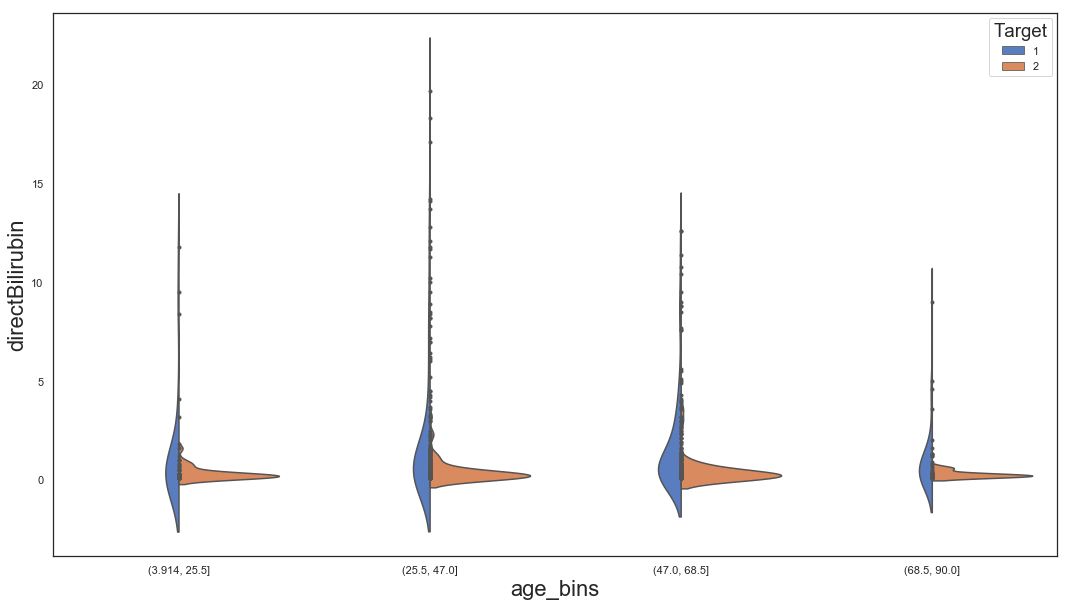

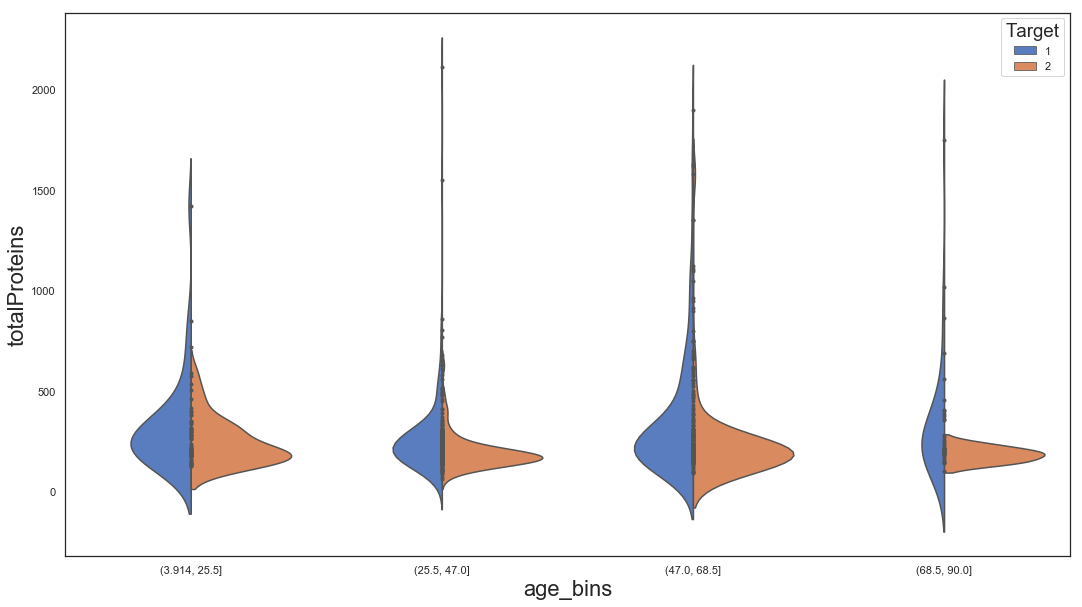

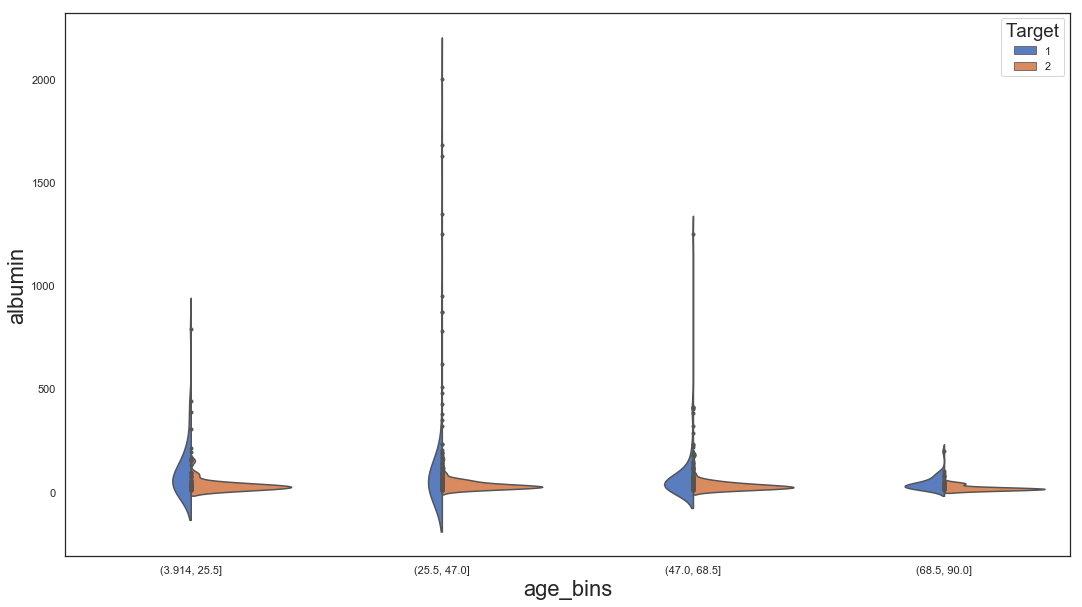

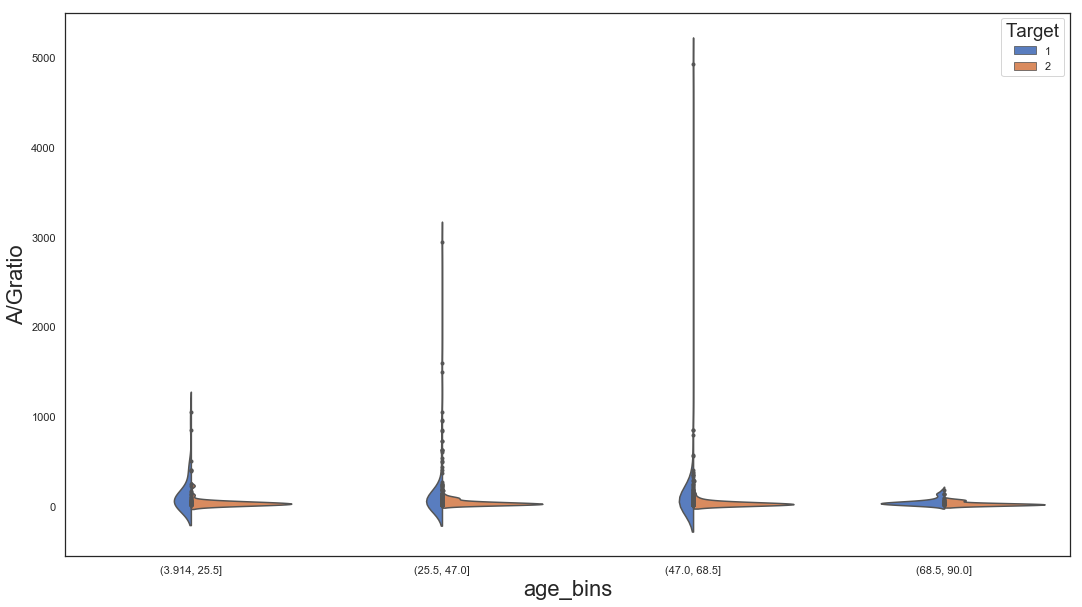

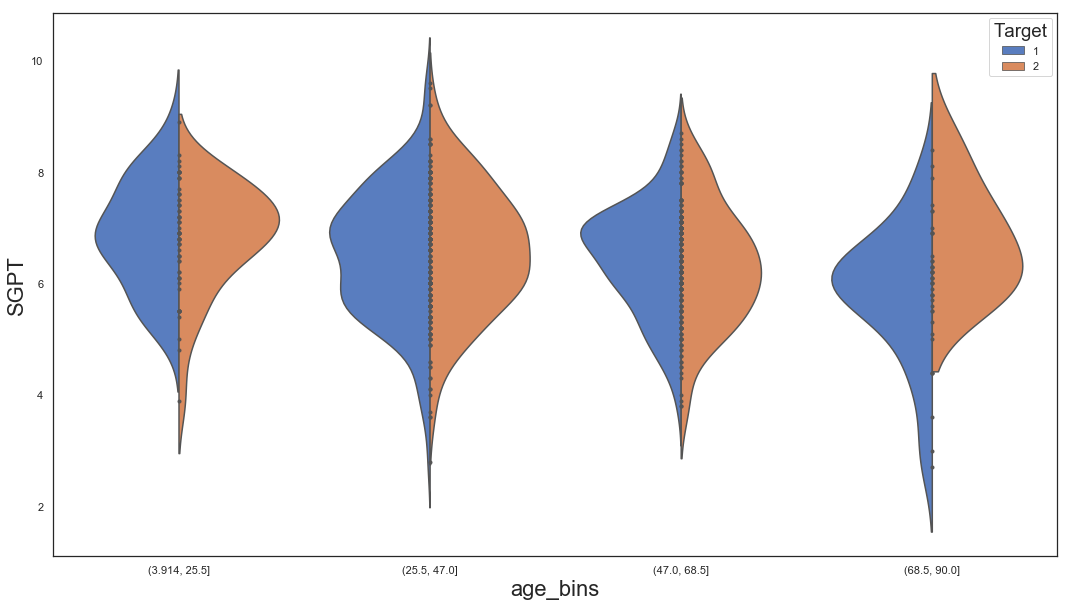

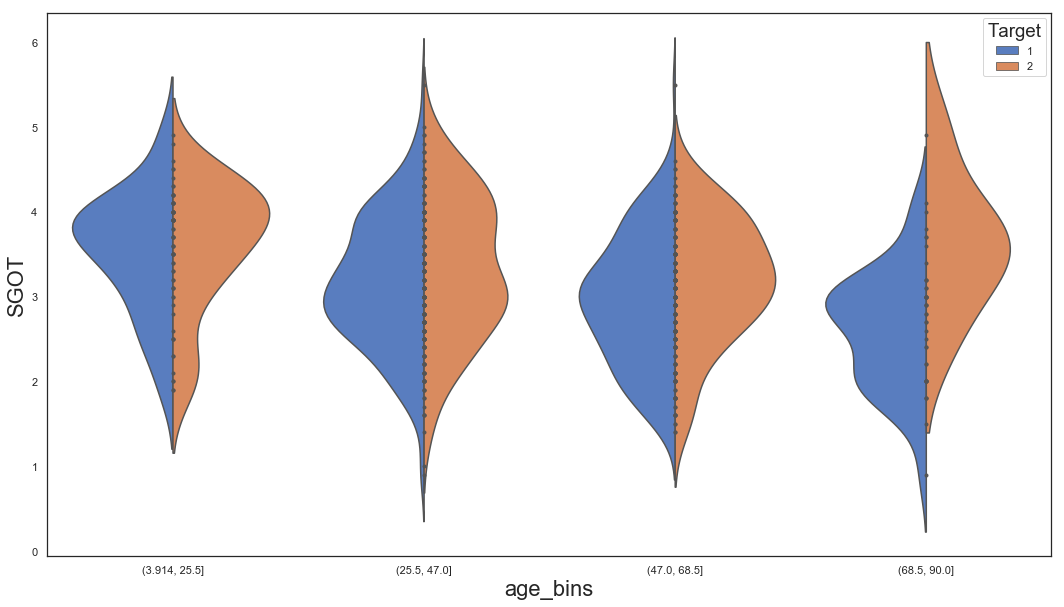

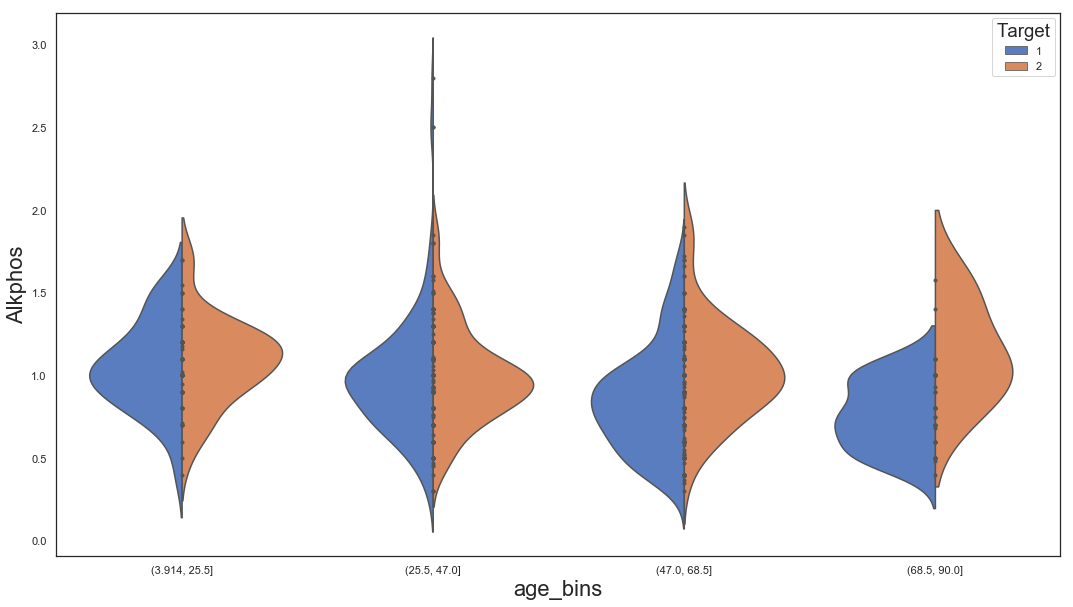

In [2267]:
df_age_bins = df.select_dtypes(np.number)
cols = df_age_bins.columns.drop(['age','Target'])

n_bins=4
df_age_bins['age_bins'],bins = pd.cut(x=df.age,bins=n_bins, retbins=True)

print(cols)
df_age_bins.head()



for col in cols:
    plt.figure(figsize=(18, 10))
    sns.violinplot(x='age_bins', y=col, data=df_age_bins, hue='Target',split=True,palette="muted",inner='point' )
    plt.show()
#     g.set_title(f'Violin Plot of Age Vs {v} split by disease(1) & healthy(2)', fontsize=15)

<br><br><br><br><br>
<br><br><br><br><br>
<br><br><br><br><br>

### Question 3 - Log Normal (15 points)

Consider LogNormal(μ,σ$^2$) distributions:   
Y1 ~ LogNormal(0,0.25)   
Y2 ~ LogNormal(0,1)  

(recall that μ and σ are the mean and std of the underlying normal distribution)

In [1788]:
mu1,mu2 = 0,0
sigma1,sigma2 = 0.25,1

Y1 = ss.lognorm(sigma1,loc=mu1)
Y2 = ss.lognorm(sigma2,loc=mu2)

#### 3.A
Draw a plot of the pdfs for Y1 and Y2 on the same axes, over the x range of [0 10].

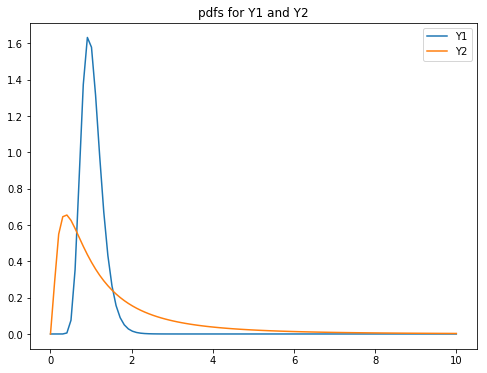

In [1789]:
x = np.linspace(0,10,100)

plt.figure(figsize=(8,6))
plt.plot(x,Y1.pdf(x),label='Y1',)
plt.plot(x,Y2.pdf(x),label='Y2')
plt.title('pdfs for Y1 and Y2')
plt.legend()
plt.show()

#### 3.B
What is E(Y1)? E(Y2)?

In [1790]:
print('E(Y1) = ' + str(round(Y1.mean(),5)))
print('E(Y1) = ' + str(round(Y2.mean(),5)))

E(Y1) = 1.03174
E(Y1) = 1.64872


#### 3.C
What is the probability of Y1 being more than 4 stds larger than its mean?

In [1791]:
round(1 - Y1.cdf(x=Y1.mean() + 4*Y1.std()),7)

0.0016996

#### 3.D
What is the probability of Y2 being more than 4 stds larger than its mean?

In [1792]:
round(1 - Y2.cdf(x=Y2.mean() + 4*Y2.std()),5)

0.00986

#### 3.E
What is the IQR of Y1? Of Y2?

In [1793]:
print('IQR(Y1) = ' + str(round(Y1.ppf(0.75) - Y1.ppf(0.25),5)))
print('IQR(Y1) = ' + str(round(Y2.ppf(0.75) - Y2.ppf(0.25),5)))

IQR(Y1) = 0.33885
IQR(Y1) = 1.45361


<br><br><br><br><br>
<br><br><br><br><br>

### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.5 & 0.2 & 0.05 & 0 & 0.05 & 0.2 \\
0.2 & 0.5 & 0.2 & 0.05 & 0 & 0.05 \\
0.05 & 0.2 & 0.5 & 0.2 & 0.05 & 0 \\
0 & 0.05 & 0.2 & 0.5 & 0.2 & 0.05 \\
0.05 & 0 & 0.05 & 0.2 & 0.5 & 0.2 \\
0.2 & 0.05 & 0 & 0.05 & 0.2 & 0.5
\end{pmatrix}
\end{equation*}

In [1684]:
v = [1,2,3,4,5,6]
x0 = ss.uniform(0,6).pdf(x=v)

T = np.array([0.5,0.2,0.05,0,0.05,0.2,0.2,0.5,0.2,0.05,0,0.05,0.05,0.2,0.5,0.2,0.05,0,0,0.05,0.2,0.5,0.2,0.05,0.05,0,0.05,0.2,0.5,0.2,0.2,0.05,0,0.05,0.2,0.5])
T = T.reshape((6,6))
T

array([[0.5 , 0.2 , 0.05, 0.  , 0.05, 0.2 ],
       [0.2 , 0.5 , 0.2 , 0.05, 0.  , 0.05],
       [0.05, 0.2 , 0.5 , 0.2 , 0.05, 0.  ],
       [0.  , 0.05, 0.2 , 0.5 , 0.2 , 0.05],
       [0.05, 0.  , 0.05, 0.2 , 0.5 , 0.2 ],
       [0.2 , 0.05, 0.  , 0.05, 0.2 , 0.5 ]])

#### 4.A
Construct 1000 trajectories, each of length 20.
1. What do you expect the average value of all 20 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [1685]:
def get_hist_average_value_trajectory(proba_state_zero,trajectory_matrix,values=[1,2,3,4,5,6],n_trajuctories=1000,n_rolls=20):
    sums = np.zeros(n_trajuctories)
    for trajectory in range(n_trajuctories):
        sum = 0
        proba_state = proba_state_zero
        T = trajectory_matrix
        for roll in range(n_rolls):
            state = np.random.choice(a=values,p=proba_state)
            proba_state = T[state-1]
            sum = sum+state
        sums[trajectory] = sum/n_rolls
    return sums

###### 1. What do you expect the average value of all 20 numbers in a trajectory to be?

In [1686]:
# round(np.linalg.matrix_power(T, 20).dot(x0).dot(v),4)
round(T.dot(x0).dot(v),4)

3.5

In [1687]:
np.std(sums),np.std(sums20)

(0.7140101382333448, 0.7184110522535132)

##### 2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.


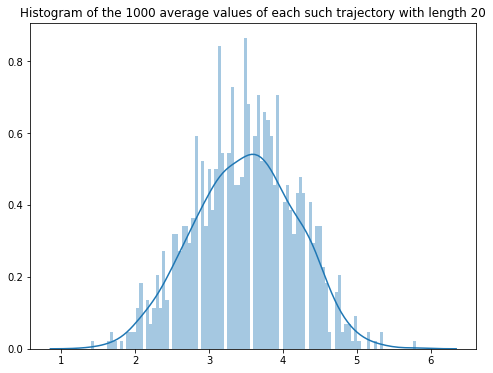

In [1718]:
sums20 = get_hist_average_value_trajectory(proba_state_zero=x0,trajectory_matrix=T,values=v,n_trajuctories=1000,n_rolls=20)
plt.figure(figsize=(8,6))
sns.distplot(sums20,bins=100)
plt.title('Histogram of the 1000 average values of each such trajectory with length 20')
plt.show()

##### What does the distribution look like? What are the empirical mean and the std?

It looks like a Normal distribution, with empirical mean of 3.49 and a std of 0.683


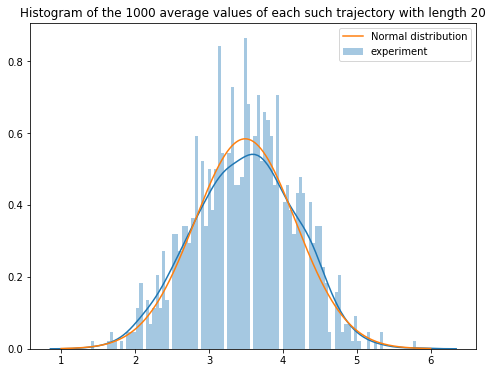

In [1719]:
print('It looks like a Normal distribution, with empirical mean of {0} and a std of {1}'.format(round(sums20.mean(),3),round(sums20.std(),3)))

x = np.linspace(1,6,1000)

plt.figure(figsize=(8,6))
sns.distplot(sums20,bins=100,kde=True,label='experiment')
plt.plot(x, ss.norm.pdf(x, loc = sums20.mean() ,scale = sums20.std()),label='Normal distribution')
plt.title('Histogram of the 1000 average values of each such trajectory with length 20')
plt.legend()
plt.show()


#### 4.B
Construct 1000 trajectories, each of length 2000.
1. What do you expect the average value of all 2000 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [1679]:
sums2000 = get_hist_average_value_trajectory(proba_state_zero=x0,trajectory_matrix=T,values=v,n_trajuctories=1000,n_rolls=2000)

##### 1. What do you expect the average value of all 2000 numbers in a trajectory to be?

After a number of times multiplying again and again, the stationary distribution is reached, and it's equal to the initial distribution.  

In [1690]:
np.linalg.matrix_power(T, 2000)

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]])

Therefore the expected value will be of the initial uniform distribution, which is 3.5 .

In [1691]:
round(np.linalg.matrix_power(T, 2000).dot(x0).dot(v),4)

3.5

##### 2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.


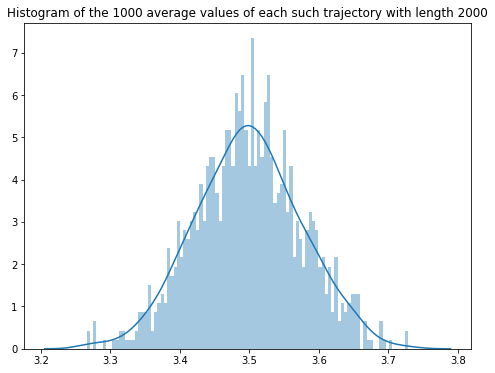

In [1720]:
plt.figure(figsize=(8,6))
sns.distplot(sums2000,bins=100)
plt.title('Histogram of the 1000 average values of each such trajectory with length 2000')
plt.show()

##### 3. What does the distribution look like? What are the empirical mean and the std?

It looks like a Normal distribution, with empirical mean of 3.498396 and a std of 0.0


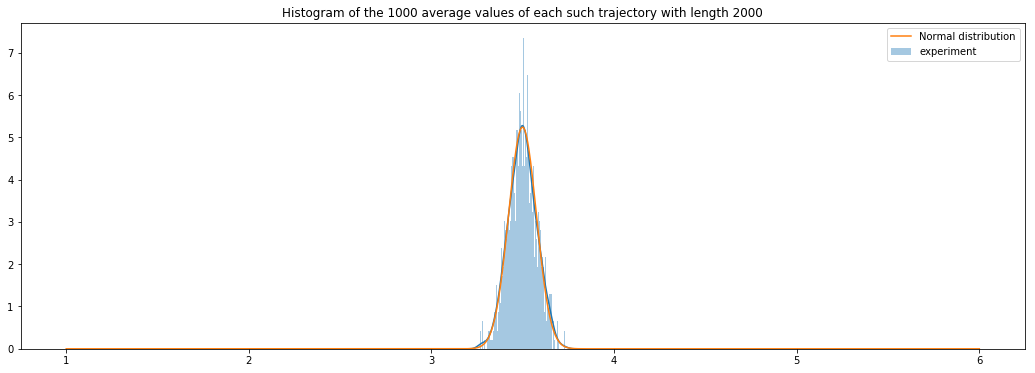

In [1722]:
print('It looks like a Normal distribution, with empirical mean of {0} and a std of {1}'.format(round(sums2000.mean(),10),round(sums2000.std()),10))

x = np.linspace(1,6,1000)

plt.figure(figsize=(18,6))
sns.distplot(sums2000,bins=100,kde=True,label='experiment')
plt.plot(x, ss.norm.pdf(x, loc = sums2000.mean() ,scale = sums2000.std()),label='Normal distribution')
plt.title('Histogram of the 1000 average values of each such trajectory with length 2000')
plt.legend()
plt.show()

#### 4.C
Draw normal fit curves on your two histograms.

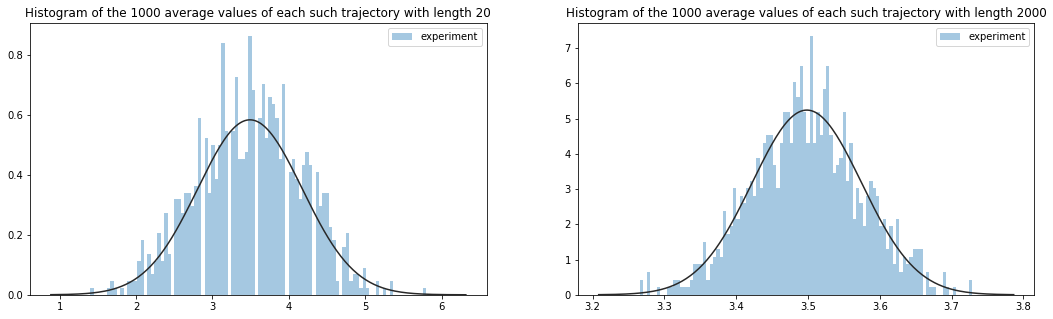

In [1723]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
sns.distplot(sums20,bins=100,kde=False,norm_hist=True,fit=scipy.stats.norm,label='experiment')
# plt.plot(x, ss.norm.pdf(x, loc = sums20.mean() ,scale = sums20.std()),label='Normal distribution')
plt.title('Histogram of the 1000 average values of each such trajectory with length 20')
plt.legend()

plt.subplot(1, 2, 2)
sns.distplot(sums2000,bins=100,kde=False,norm_hist=True,fit=ss.norm,label='experiment')
# plt.plot(x, ss.norm.pdf(x, loc = sums2000.mean() ,scale = sums2000.std()),label='Normal distribution')
plt.title('Histogram of the 1000 average values of each such trajectory with length 2000')

plt.legend()
plt.show()

#### 4.D - Bonus
Can you try to formulate a CLT for Markov chains from your findings?

##### Answer:
If I'll ignore the Central Limit Theorem in respect to Markov's Chains, then the central it will be something like this:  
When past the stationary distribution of a Markov chain,   
the probability distribution of the expected value - for the value along the trajectory - tends to the expected value of the stationary distribution,  
and the variance whould move to n^2 (proportional).